In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load and Inspect Data

### First, load the dataset and inspect the initial few rows to understand the structure and types of data.

In [2]:
Telecom_data = pd.read_csv(r"C:\Users\NITESH NAMDEV\Nexthike projects\Telecom_Project 5\telcom_data.csv")

In [3]:
Telecom_data

Bearer Id             Start  Start ms               End  End ms  \
0       1.311450e+19  04-04-2019 12:01     770.0  25-04-2019 14:35   662.0   
1       1.311450e+19  09-04-2019 13:04     235.0  25-04-2019 08:15   606.0   
2       1.311450e+19  09-04-2019 17:42       1.0  25-04-2019 11:58   652.0   
3       1.311450e+19  10-04-2019 00:31     486.0  25-04-2019 07:36   171.0   
4       1.311450e+19  12-04-2019 20:10     565.0  25-04-2019 10:40   954.0   
...              ...               ...       ...               ...     ...   
149996  7.277830e+18  29-04-2019 07:28     451.0  30-04-2019 06:02   214.0   
149997  7.349880e+18  29-04-2019 07:28     483.0  30-04-2019 10:41   187.0   
149998  1.311450e+19  29-04-2019 07:28     283.0  30-04-2019 10:46   810.0   
149999  1.311450e+19  29-04-2019 07:28     696.0  30-04-2019 10:40   327.0   
150000           NaN               NaN       NaN               NaN     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.082010e+14   3.366496e+10  3.552120e+13   
1       1365104.0  2.082020e+14   3.368185e+10  3.579400e+13   
2       1361762.0  2.082000e+14   3.376063e+10  3.528150e+13   
3       1321509.0  2.082010e+14   3.375034e+10  3.535660e+13   
4       1089009.0  2.082010e+14   3.369980e+10  3.540700e+13   
...           ...           ...            ...           ...   
149996    81230.0  2.082020e+14   3.365069e+10  3.548310e+13   
149997    97970.0  2.082020e+14   3.366345e+10  3.566050e+13   
149998    98249.0  2.082020e+14   3.362189e+10  3.572120e+13   
149999    97910.0  2.082020e+14   3.361962e+10  8.618620e+13   
150000        NaN           NaN            NaN           NaN   

       Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0             9.16457E+15  ...          15854611.0          2501332.00   
1                 L77566A  ...          20247395.0         19111729.00   
2                 D42335A  ...          19725661.0         14699576.00   
3                 T21824A  ...          21388122.0         15146643.00   
4                 D88865A  ...          15259380.0         18962873.00   
...                   ...  ...                 ...                 ...   
149996            D20434A  ...          16191667.0         11763428.00   
149997            D10223C  ...          13877234.0          8288284.00   
149998            T51102A  ...          22660510.0          1855903.00   
149999            L88342B  ...           8817106.0          8305402.00   
150000                NaN  ...          11634072.5         11009410.13   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0               8198936.00          9656251.00        278082303.0   
1              18338413.00         17227132.00        608750074.0   
2              17587794.00          6163408.00        229584621.0   
3              13994646.00          1097942.00        799538153.0   
4              17124581.00           415218.00        527707248.0   
...                    ...                 ...                ...   
149996         17883703.00         19678161.00        526609673.0   
149997         19350146.00         21293148.00        626893062.0   
149998          9963942.00          5065760.00        553539484.0   
149999          3322253.00         13172589.00        352536971.0   
150000         11626851.72         11001754.82        422044702.6   

        Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
0            1.434415e+07       171744450.0      8.814393e+06   
1            1.170709e+06       526904238.0      1.505514e+07   
2            3.956300e+05       410692588.0      4.215763e+06   
3            1.084972e+07       749039933.0      1.279728e+07   
4            3.529801e+06       550709500.0      1.391032e+07   
...                   ...               ...               ...   
149996       9.197207e+06         3264510.0      1.348742e+07   
149997       4.735033e+06       712180387.0      2.457758e+06   
14

In [4]:
Telecom_data.head()

Bearer Id             Start  Start ms               End  End ms  \
0  1.311450e+19  04-04-2019 12:01     770.0  25-04-2019 14:35   662.0   
1  1.311450e+19  09-04-2019 13:04     235.0  25-04-2019 08:15   606.0   
2  1.311450e+19  09-04-2019 17:42       1.0  25-04-2019 11:58   652.0   
3  1.311450e+19  10-04-2019 00:31     486.0  25-04-2019 07:36   171.0   
4  1.311450e+19  12-04-2019 20:10     565.0  25-04-2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI Last Location Name  \
0  1823652.0  2.082010e+14   3.366496e+10  3.552120e+13        9.16457E+15   
1  1365104.0  2.082020e+14   3.368185e+10  3.579400e+13            L77566A   
2  1361762.0  2.082000e+14   3.376063e+10  3.528150e+13            D42335A   
3  1321509.0  2.082010e+14   3.375034e+10  3.535660e+13            T21824A   
4  1089009.0  2.082010e+14   3.369980e+10  3.540700e+13            D88865A   

   ...  Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0  ...          15854611.0           2501332.0           8198936.0   
1  ...          20247395.0          19111729.0          18338413.0   
2  ...          19725661.0          14699576.0          17587794.0   
3  ...          21388122.0          15146643.0          13994646.0   
4  ...          15259380.0          18962873.0          17124581.0   

   Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
0           9656251.0        278082303.0         14344150.0       171744450.0   
1          17227132.0        608750074.0          1170709.0       526904238.0   
2           6163408.0        229584621.0           395630.0       410692588.0   
3           1097942.0        799538153.0         10849722.0       749039933.0   
4            415218.0        527707248.0          3529801.0       550709500.0   

   Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
0         8814393.0        36749741.0       308879636.0  
1        15055145.0        53800391.0       653384965.0  
2         4215763.0        27883638.0       279807335.0  
3        12797283.0        43324218.0       846028530.0  
4        13910322.0        38542814.0       569138589.0  

[5 rows x 55 columns]

In [5]:
Telecom_data.tail()

Bearer Id             Start  Start ms               End  End ms  \
149996  7.277830e+18  29-04-2019 07:28     451.0  30-04-2019 06:02   214.0   
149997  7.349880e+18  29-04-2019 07:28     483.0  30-04-2019 10:41   187.0   
149998  1.311450e+19  29-04-2019 07:28     283.0  30-04-2019 10:46   810.0   
149999  1.311450e+19  29-04-2019 07:28     696.0  30-04-2019 10:40   327.0   
150000           NaN               NaN       NaN               NaN     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
149996    81230.0  2.082020e+14   3.365069e+10  3.548310e+13   
149997    97970.0  2.082020e+14   3.366345e+10  3.566050e+13   
149998    98249.0  2.082020e+14   3.362189e+10  3.572120e+13   
149999    97910.0  2.082020e+14   3.361962e+10  8.618620e+13   
150000        NaN           NaN            NaN           NaN   

       Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
149996            D20434A  ...          16191667.0         11763428.00   
149997            D10223C  ...          13877234.0          8288284.00   
149998            T51102A  ...          22660510.0          1855903.00   
149999            L88342B  ...           8817106.0          8305402.00   
150000                NaN  ...          11634072.5         11009410.13   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
149996         17883703.00         19678161.00        526609673.0   
149997         19350146.00         21293148.00        626893062.0   
149998          9963942.00          5065760.00        553539484.0   
149999          3322253.00         13172589.00        352536971.0   
150000         11626851.72         11001754.82        422044702.6   

        Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
149996       9.197207e+06         3264510.0      1.348742e+07   
149997       4.735033e+06       712180387.0      2.457758e+06   
149998       1.339432e+07       121100856.0      1.131473e+07   
149999       2.529475e+06       814713113.0      1.406930e+06   
150000       8.288398e+06       421100544.2      8.264799e+06   

        Total UL (Bytes)  Total DL (Bytes)  
149996        57628851.0       574175259.0  
149997        39135081.0       666648844.0  
149998        34912224.0       592786405.0  
149999        29626096.0       371895920.0  
150000               NaN               NaN  

[5 rows x 55 columns]

In [6]:
Telecom_data.shape

(150001, 55)

In [7]:
Telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [8]:
Telecom_data.isnull().sum().sum()

1031392

In [9]:
Telecom_data.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

# Numerical Variables

In [10]:
int_features = Telecom_data.select_dtypes(include=['int64']).columns
print('Total number of integer features:',int_features.shape[0] )

print('Integer feature names:', int_features.tolist())

Total number of integer features: 0
Integer feature names: []


# Numerical Floating Variables

In [11]:
float_features = Telecom_data.select_dtypes(include=['float64']).columns
print('Total number of float features:',float_features.shape[0] )

print('floating feature names:', float_features.tolist())

Total number of float features: 50
floating feature names: ['Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL

# Categorical Variables

In [12]:
cate_features = Telecom_data.select_dtypes(include=['object']).columns
print('Total number of categorical features:',cate_features.shape[0] )

print('categorical feature names:', cate_features.tolist())

Total number of categorical features: 5
categorical feature names: ['Start', 'End', 'Last Location Name', 'Handset Manufacturer', 'Handset Type']


In [13]:
null_count = Telecom_data.isnull().sum()
null_count

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [14]:
null_percent = Telecom_data.isnull().sum()/Telecom_data.shape[0]*100
null_percent

Bearer Id                                    0.660662
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%

# Finding the missing values

In [15]:
missing_value_feat = null_percent[null_percent > 0]
print('Total missing value features = ', len(missing_value_feat))

Total missing value features =  41


In [16]:
missing_value_feat

Bearer Id                                    0.660662
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%

In [17]:
cate_missing_feat = missing_value_feat[missing_value_feat.keys().isin(cate_features)]
print('Total number of categorical missing features = ',len(cate_missing_feat))
cate_missing_feat

Total number of categorical missing features =  5


Start                   0.000667
End                     0.000667
Last Location Name      0.768662
Handset Manufacturer    0.381331
Handset Type            0.381331
dtype: float64

In [18]:
int_missing_feat = missing_value_feat[missing_value_feat.keys().isin(int_features)]
print('Total number of Integer missing features = ',len(int_missing_feat))
int_missing_feat

Total number of Integer missing features =  0


Series([], dtype: float64)

In [19]:
float_missing_feat = missing_value_feat[missing_value_feat.keys().isin(float_features)]
print('Total number of Floating missing features = ',len(float_missing_feat))
float_missing_feat

Total number of Floating missing features =  36


Bearer Id                                    0.660662
Start ms                                     0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%)                0.502663
DL TP > 1 Mbps (%)                           0.502663
UL TP < 10 Kbps (%)                          0.527996
10 Kbps < UL TP < 50 Kbps (%

In [20]:
Telecom_data['Start']

0         04-04-2019 12:01
1         09-04-2019 13:04
2         09-04-2019 17:42
3         10-04-2019 00:31
4         12-04-2019 20:10
                ...       
149996    29-04-2019 07:28
149997    29-04-2019 07:28
149998    29-04-2019 07:28
149999    29-04-2019 07:28
150000                 NaN
Name: Start, Length: 150001, dtype: object

In [21]:
import pandas as pd

# Assuming your date-time feature is in a DataFrame column named 'datetime_feature'
# Convert the feature to datetime format
Telecom_data['Start'] = pd.to_datetime(Telecom_data['Start'])

# Extract numerical values
Telecom_data['year'] = Telecom_data['Start'].dt.year
Telecom_data['month'] = Telecom_data['Start'].dt.month
Telecom_data['day'] = Telecom_data['Start'].dt.day
Telecom_data['hour'] = Telecom_data['Start'].dt.hour
Telecom_data['minute'] = Telecom_data['Start'].dt.minute

# If needed, you can further combine these numerical features into a single numerical representation
# For example, you can convert the date-time feature into total minutes elapsed since a reference date
reference_date = pd.to_datetime('2019-01-01')
Telecom_data['total_minutes_elapsed'] = (Telecom_data['Start'] - reference_date).dt.total_seconds() / 60

# Check the modified DataFrame
print(Telecom_data)


           Bearer Id               Start  Start ms               End  End ms  \
0       1.311450e+19 2019-04-04 12:01:00     770.0  25-04-2019 14:35   662.0   
1       1.311450e+19 2019-09-04 13:04:00     235.0  25-04-2019 08:15   606.0   
2       1.311450e+19 2019-09-04 17:42:00       1.0  25-04-2019 11:58   652.0   
3       1.311450e+19 2019-10-04 00:31:00     486.0  25-04-2019 07:36   171.0   
4       1.311450e+19 2019-12-04 20:10:00     565.0  25-04-2019 10:40   954.0   
...              ...                 ...       ...               ...     ...   
149996  7.277830e+18 2019-04-29 07:28:00     451.0  30-04-2019 06:02   214.0   
149997  7.349880e+18 2019-04-29 07:28:00     483.0  30-04-2019 10:41   187.0   
149998  1.311450e+19 2019-04-29 07:28:00     283.0  30-04-2019 10:46   810.0   
149999  1.311450e+19 2019-04-29 07:28:00     696.0  30-04-2019 10:40   327.0   
150000           NaN                 NaT       NaN               NaN     NaN   

        Dur. (ms)          IMSI  MSISDN

In [22]:
Telecom_data['Start']

0        2019-04-04 12:01:00
1        2019-09-04 13:04:00
2        2019-09-04 17:42:00
3        2019-10-04 00:31:00
4        2019-12-04 20:10:00
                 ...        
149996   2019-04-29 07:28:00
149997   2019-04-29 07:28:00
149998   2019-04-29 07:28:00
149999   2019-04-29 07:28:00
150000                   NaT
Name: Start, Length: 150001, dtype: datetime64[ns]

In [23]:
Telecom_data['Start'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 150001 entries, 0 to 150000
Series name: Start
Non-Null Count   Dtype         
--------------   -----         
150000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.1 MB


In [24]:
Telecom_data.head()

Bearer Id               Start  Start ms               End  End ms  \
0  1.311450e+19 2019-04-04 12:01:00     770.0  25-04-2019 14:35   662.0   
1  1.311450e+19 2019-09-04 13:04:00     235.0  25-04-2019 08:15   606.0   
2  1.311450e+19 2019-09-04 17:42:00       1.0  25-04-2019 11:58   652.0   
3  1.311450e+19 2019-10-04 00:31:00     486.0  25-04-2019 07:36   171.0   
4  1.311450e+19 2019-12-04 20:10:00     565.0  25-04-2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI Last Location Name  \
0  1823652.0  2.082010e+14   3.366496e+10  3.552120e+13        9.16457E+15   
1  1365104.0  2.082020e+14   3.368185e+10  3.579400e+13            L77566A   
2  1361762.0  2.082000e+14   3.376063e+10  3.528150e+13            D42335A   
3  1321509.0  2.082010e+14   3.375034e+10  3.535660e+13            T21824A   
4  1089009.0  2.082010e+14   3.369980e+10  3.540700e+13            D88865A   

   ...  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
0  ...       171744450.0         8814393.0        36749741.0   
1  ...       526904238.0        15055145.0        53800391.0   
2  ...       410692588.0         4215763.0        27883638.0   
3  ...       749039933.0        12797283.0        43324218.0   
4  ...       550709500.0        13910322.0        38542814.0   

   Total DL (Bytes)    year  month  day  hour  minute  total_minutes_elapsed  
0       308879636.0  2019.0    4.0  4.0  12.0     1.0               134641.0  
1       653384965.0  2019.0    9.0  4.0  13.0     4.0               355024.0  
2       279807335.0  2019.0    9.0  4.0  17.0    42.0               355302.0  
3       846028530.0  2019.0   10.0  4.0   0.0    31.0               397471.0  
4       569138589.0  2019.0   12.0  4.0  20.0    10.0               486490.0  

[5 rows x 61 columns]

In [25]:
# Assuming your date-time feature is in a DataFrame column named 'datetime_feature'
# Convert the feature to datetime format
Telecom_data['End'] = pd.to_datetime(Telecom_data['End'])

# Extract numerical values
Telecom_data['year'] = Telecom_data['End'].dt.year
Telecom_data['month'] = Telecom_data['End'].dt.month
Telecom_data['day'] = Telecom_data['End'].dt.day
Telecom_data['hour'] = Telecom_data['End'].dt.hour
Telecom_data['minute'] = Telecom_data['End'].dt.minute

# If needed, you can further combine these numerical features into a single numerical representation
# For example, you can convert the date-time feature into total minutes elapsed since a reference date
reference_date = pd.to_datetime('2019-01-01')
Telecom_data['total_minutes_elapsed'] = (Telecom_data['End'] - reference_date).dt.total_seconds() / 60

# Check the modified DataFrame
print(Telecom_data)


           Bearer Id               Start  Start ms                 End  \
0       1.311450e+19 2019-04-04 12:01:00     770.0 2019-04-25 14:35:00   
1       1.311450e+19 2019-09-04 13:04:00     235.0 2019-04-25 08:15:00   
2       1.311450e+19 2019-09-04 17:42:00       1.0 2019-04-25 11:58:00   
3       1.311450e+19 2019-10-04 00:31:00     486.0 2019-04-25 07:36:00   
4       1.311450e+19 2019-12-04 20:10:00     565.0 2019-04-25 10:40:00   
...              ...                 ...       ...                 ...   
149996  7.277830e+18 2019-04-29 07:28:00     451.0 2019-04-30 06:02:00   
149997  7.349880e+18 2019-04-29 07:28:00     483.0 2019-04-30 10:41:00   
149998  1.311450e+19 2019-04-29 07:28:00     283.0 2019-04-30 10:46:00   
149999  1.311450e+19 2019-04-29 07:28:00     696.0 2019-04-30 10:40:00   
150000           NaN                 NaT       NaN                 NaT   

        End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0        662.0  1823652.0  2.082010e+14

In [26]:
Telecom_data['End'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 150001 entries, 0 to 150000
Series name: End
Non-Null Count   Dtype         
--------------   -----         
150000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.1 MB


In [27]:
Telecom_data['Last Location Name'].value_counts()

9.16457E+15    1881
8.12222E+16     187
D41377B          80
1.5328E+17       61
D17085A          59
               ... 
L30051B           1
T42260C           1
D88489B           1
T85728A           1
L88342B           1
Name: Last Location Name, Length: 45036, dtype: int64

In [28]:
Telecom_data_mode = Telecom_data['Last Location Name'].mode()[0]
Telecom_data['Last Location Name'].replace(np.nan,Telecom_data_mode,inplace=True)

In [29]:
Telecom_data['Last Location Name'].isnull().sum()

0

In [30]:
Telecom_data['Handset Manufacturer'].value_counts()

Apple                               59565
Samsung                             40839
Huawei                              34423
undefined                            8987
Sony Mobile Communications Ab         980
                                    ...  
Pt. Arga Mas Lestari                    1
Doke Communication (Hk) Limited         1
Vastking Technology (Hk) Limited        1
Mobiwire Sas                            1
Shenzhen Gaoxinqi                       1
Name: Handset Manufacturer, Length: 170, dtype: int64

In [31]:
Telecom_data['Handset Manufacturer'].isnull().sum()

572

In [32]:
Telecom_data_mode = Telecom_data['Handset Manufacturer'].mode()[0]
Telecom_data['Handset Manufacturer'].replace(np.nan,Telecom_data_mode,inplace=True)

In [33]:
Telecom_data['Handset Manufacturer'].isnull().sum()

0

In [34]:
Telecom_data['Handset Type'].value_counts()

Huawei B528S-23A                                           19752
Apple iPhone 6S (A1688)                                     9419
Apple iPhone 6 (A1586)                                      9023
undefined                                                   8987
Apple iPhone 7 (A1778)                                      6326
                                                           ...  
Tct Mobile Suzho. Alcatel One Touch Y580D                      1
Shenzhen Fortune. M-Ppas6                                      1
Wiko Global Sasu Wiko Ridge 4G                                 1
Hongkong Ipro Te. Ipro I9350 I9400 S3 Wave 3.5 Wave 4.0        1
Shenzhen Jeko Co. Blackview Bv5800 Pro                         1
Name: Handset Type, Length: 1396, dtype: int64

In [35]:
Telecom_data['Handset Type'].isnull().sum()

572

In [36]:
Telecom_data_mode = Telecom_data['Handset Type'].mode()[0]
Telecom_data['Handset Type'].replace(np.nan,Telecom_data_mode,inplace=True)

In [37]:
Telecom_data['Handset Type'].isnull().sum()

0

In [38]:
Telecom_data['Start'].value_counts()

2019-04-26 07:25:00    203
2019-04-26 07:26:00    190
2019-04-26 07:36:00    175
2019-04-26 07:30:00    160
2019-04-26 07:46:00    143
                      ... 
2019-04-21 08:04:00      1
2019-04-21 01:57:00      1
2019-04-21 01:56:00      1
2019-04-20 23:56:00      1
2019-04-04 12:01:00      1
Name: Start, Length: 9997, dtype: int64

In [39]:
Telecom_data['Start'].isnull().sum()

1

In [40]:
Telecom_data_mode = Telecom_data['Start'].mode()[0]
Telecom_data['Start'].replace(np.nan,Telecom_data_mode,inplace=True)

In [41]:
Telecom_data['Start'].isnull().sum()

0

In [42]:
Telecom_data['End'].value_counts()

2019-04-25 00:01:00    1150
2019-04-25 00:02:00     418
2019-04-25 00:00:00     296
2019-04-25 00:48:00     286
2019-04-28 00:00:00     275
                       ... 
2019-04-28 11:32:00       1
2019-04-28 13:54:00       1
2019-04-28 11:58:00       1
2019-04-28 10:26:00       1
2019-04-30 22:32:00       1
Name: End, Length: 6403, dtype: int64

In [43]:
Telecom_data_mode = Telecom_data['End'].mode()[0]
Telecom_data['End'].replace(np.nan,Telecom_data_mode,inplace=True)

In [44]:
Telecom_data['End'].isnull().sum()

0

In [45]:
mean_values = float_missing_feat
Telecom_data.fillna(value=mean_values, inplace=True)

# Save the updated DataFrame to a new CSV file
# df.to_csv('data_filled.csv', index=False)

In [46]:
Telecom_data.isnull().sum().sum()

6

In [47]:
Telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 61 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  float64       
 1   Start                                     150001 non-null  datetime64[ns]
 2   Start ms                                  150001 non-null  float64       
 3   End                                       150001 non-null  datetime64[ns]
 4   End ms                                    150001 non-null  float64       
 5   Dur. (ms)                                 150001 non-null  float64       
 6   IMSI                                      150001 non-null  float64       
 7   MSISDN/Number                             150001 non-null  float64       
 8   IMEI                                      150001 non-null  float64       
 9   Last Location N

In [48]:
missing_values = ['year','month','day','hour','minute','total_minutes_elapsed']

# Fill the single missing value in each column with a specified value
Telecom_data['year'].fillna(Telecom_data['year'].mean(), inplace=True)
Telecom_data['month'].fillna(Telecom_data['month'].mean(), inplace=True)
Telecom_data['day'].fillna(Telecom_data['day'].mean(), inplace=True)
Telecom_data['hour'].fillna(Telecom_data['hour'].mean(), inplace=True)
Telecom_data['minute'].fillna(Telecom_data['minute'].mean(), inplace=True)
Telecom_data['total_minutes_elapsed'].fillna(Telecom_data['total_minutes_elapsed'].mean(), inplace=True)

In [49]:
Telecom_data['year'].isnull().sum().sum()

0

In [50]:
Telecom_data.isnull().sum().sum()

0

In [51]:
Telecom_data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


# Task 1

#  Identify the Top 10 Handsets and Top 3 Manufacturers

Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64


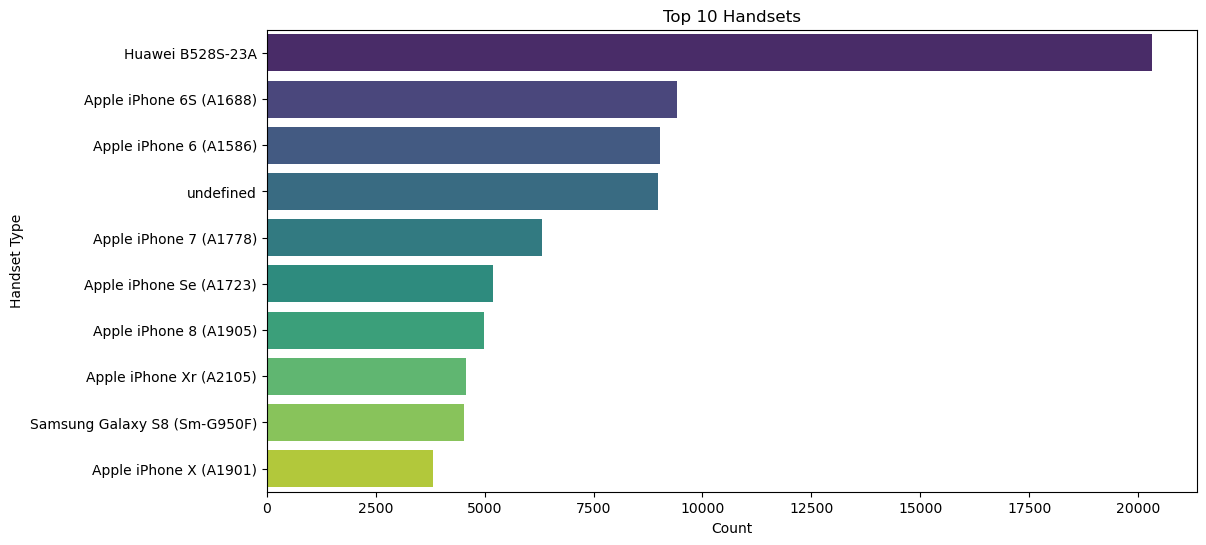

Apple      60137
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64


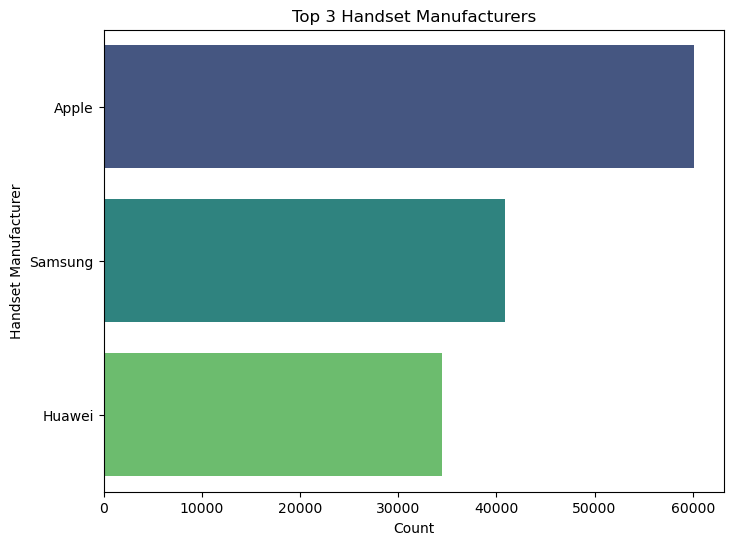

In [52]:
# Top 10 handsets used by customers
top_10_handsets = Telecom_data['Handset Type'].value_counts().head(10)
print(top_10_handsets)

# Plot Top 10 Handsets
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_handsets.values, y=top_10_handsets.index, palette='viridis')
plt.title('Top 10 Handsets')
plt.xlabel('Count')
plt.ylabel('Handset Type')
plt.show()

# Top 3 handset manufacturers
top_3_manufacturers = Telecom_data['Handset Manufacturer'].value_counts().head(3)
print(top_3_manufacturers)

# Plot Top 3 Handset Manufacturers
plt.figure(figsize=(8, 6))
sns.barplot(x=top_3_manufacturers.values, y=top_3_manufacturers.index, palette='viridis')
plt.title('Top 3 Handset Manufacturers')
plt.xlabel('Count')
plt.ylabel('Handset Manufacturer')
plt.show()

# Identify the Top 5 Handsets per Top 3 Manufacturers

Apple      60137
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64
Top 5 handsets for Apple:
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64

Top 5 handsets for Samsung:
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64

Top 5 handsets for Huawei:
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64



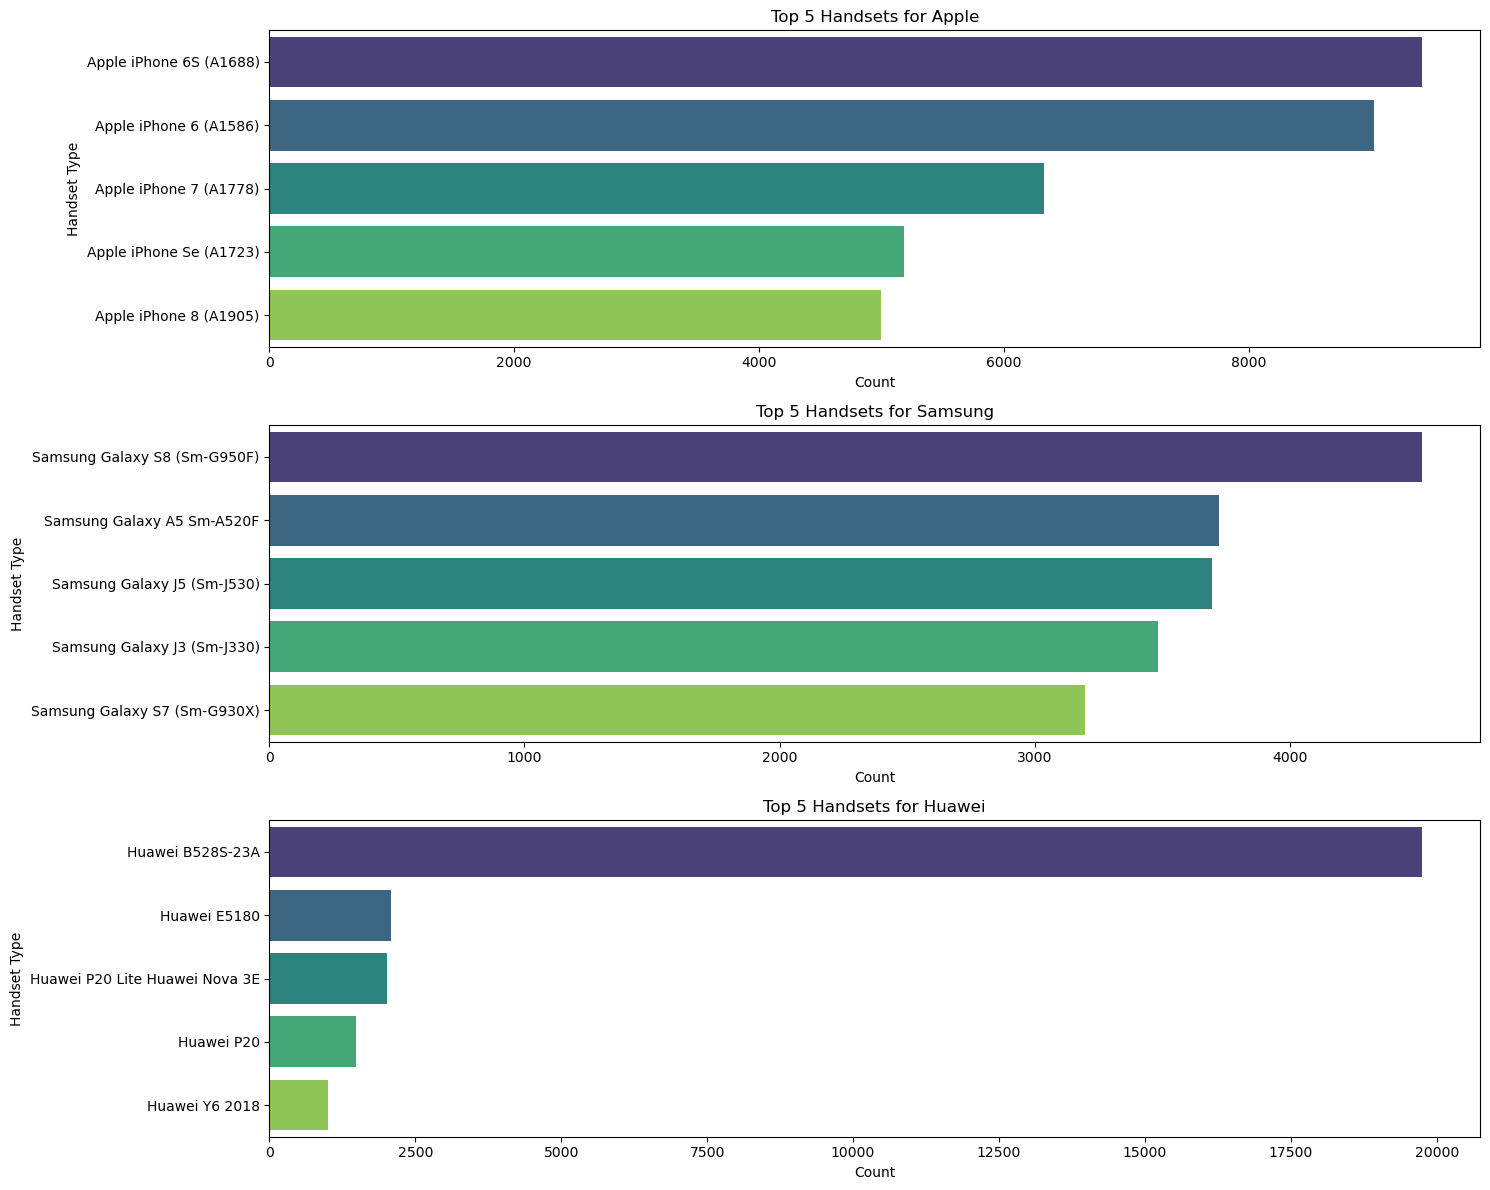

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Telecom_data is a DataFrame loaded in your environment

# Top 3 Handset Manufacturers
top_3_manufacturers = Telecom_data['Handset Manufacturer'].value_counts().head(3)
print(top_3_manufacturers)

# Plot Top 5 handsets per Top 3 Handset Manufacturers
plt.figure(figsize=(15, 12))

for i, manufacturer in enumerate(top_3_manufacturers.index):
    top_handsets = Telecom_data[Telecom_data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    print(f"Top 5 handsets for {manufacturer}:\n{top_handsets}\n")

    plt.subplot(3, 1, i + 1)  # Create a subplot for each manufacturer
    sns.barplot(x=top_handsets.values, y=top_handsets.index, palette='viridis')
    plt.title(f'Top 5 Handsets for {manufacturer}')
    plt.xlabel('Count')
    plt.ylabel('Handset Type')

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()


In [54]:
# Merge all Download and upload Data (Bytes)

Telecom_data['Total Data Volume (Bytes)'] = Telecom_data['Total UL (Bytes)'] + Telecom_data['Total DL (Bytes)']
Telecom_data['Social Media'] = Telecom_data['Social Media DL (Bytes)'] + Telecom_data['Social Media UL (Bytes)']
Telecom_data['Google'] = Telecom_data['Google DL (Bytes)'] + Telecom_data['Google UL (Bytes)']
Telecom_data['Email'] = Telecom_data['Email DL (Bytes)'] + Telecom_data['Email UL (Bytes)']
Telecom_data['Youtube'] = Telecom_data['Youtube DL (Bytes)'] + Telecom_data['Youtube UL (Bytes)']
Telecom_data['Netflix'] = Telecom_data['Netflix DL (Bytes)'] + Telecom_data['Netflix UL (Bytes)']
Telecom_data['Gaming'] = Telecom_data['Gaming DL (Bytes)'] + Telecom_data['Gaming UL (Bytes)']
Telecom_data['Other'] = Telecom_data['Other DL (Bytes)'] + Telecom_data['Other UL (Bytes)']

# User Behavior Aggregation

### Aggregate per user information for xDR sessions.

In [55]:
# Aggregate per user the required information
user_behavior = Telecom_data.groupby('IMSI').agg({
    'Bearer Id': 'sum',
    'Dur. (ms)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Total Data Volume (Bytes)': 'sum'
}).reset_index()
print(user_behavior.head())


           IMSI     Bearer Id     Dur. (ms)  Total DL (Bytes)  \
0  3.799975e-01  7.955154e+19  3.750744e+07      2.580162e+11   
1  2.040470e+14  7.277830e+18  8.698440e+05      7.869760e+07   
2  2.040810e+14  7.277830e+18  8.773850e+05      1.948281e+08   
3  2.082000e+14  9.491834e+22  9.810855e+08      4.337360e+12   
4  2.082010e+14  5.280707e+23  5.562568e+09      2.376577e+13   

   Total UL (Bytes)  Total Data Volume (Bytes)  
0      2.350613e+10               2.815223e+11  
1      6.045605e+07               1.391536e+08  
2      3.729592e+07               2.321240e+08  
3      3.936759e+11               4.731036e+12  
4      2.155629e+12               2.592140e+13  


# Handle Missing Values and Outliers

### Replace missing values with the mean and handle outliers.

In [56]:
# Handling missing values by replacing with mean
user_behavior.fillna(user_behavior.mean(), inplace=True)

# Identifying and handling outliers using IQR
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

columns_to_check = ['Bearer Id', 'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Total Data Volume (Bytes)']
for col in columns_to_check:
    handle_outliers(user_behavior, col)

print(user_behavior.describe())


               IMSI     Bearer Id     Dur. (ms)  Total DL (Bytes)  \
count  9.000000e+00  9.000000e+00  9.000000e+00      9.000000e+00   
mean   1.848074e+14  6.704788e+22  7.056533e+08      3.098174e+12   
std    6.936413e+13  1.014296e+23  1.041869e+09      4.612123e+12   
min    3.799975e-01  7.277830e+18  5.661300e+04      7.869760e+07   
25%    2.040810e+14  7.277830e+18  8.698440e+05      6.371236e+08   
50%    2.082010e+14  7.955154e+19  3.750744e+07      2.580162e+11   
75%    2.082100e+14  9.491834e+22  9.810855e+08      4.337360e+12   
max    2.140740e+14  2.372849e+23  2.451409e+09      1.084244e+13   

       Total UL (Bytes)  Total Data Volume (Bytes)  
count      9.000000e+00               9.000000e+00  
mean       2.809085e+11               3.379082e+12  
std        4.187179e+11               5.030840e+12  
min        3.729592e+07               1.391536e+08  
25%        5.738208e+07               6.945057e+08  
50%        2.350613e+10               2.815223e+11  
75%    

In [57]:
print(user_behavior.dtypes)

IMSI                         float64
Bearer Id                    float64
Dur. (ms)                    float64
Total DL (Bytes)             float64
Total UL (Bytes)             float64
Total Data Volume (Bytes)    float64
dtype: object


In [58]:
print(user_behavior.describe())

               IMSI     Bearer Id     Dur. (ms)  Total DL (Bytes)  \
count  9.000000e+00  9.000000e+00  9.000000e+00      9.000000e+00   
mean   1.848074e+14  6.704788e+22  7.056533e+08      3.098174e+12   
std    6.936413e+13  1.014296e+23  1.041869e+09      4.612123e+12   
min    3.799975e-01  7.277830e+18  5.661300e+04      7.869760e+07   
25%    2.040810e+14  7.277830e+18  8.698440e+05      6.371236e+08   
50%    2.082010e+14  7.955154e+19  3.750744e+07      2.580162e+11   
75%    2.082100e+14  9.491834e+22  9.810855e+08      4.337360e+12   
max    2.140740e+14  2.372849e+23  2.451409e+09      1.084244e+13   

       Total UL (Bytes)  Total Data Volume (Bytes)  
count      9.000000e+00               9.000000e+00  
mean       2.809085e+11               3.379082e+12  
std        4.187179e+11               5.030840e+12  
min        3.729592e+07               1.391536e+08  
25%        5.738208e+07               6.945057e+08  
50%        2.350613e+10               2.815223e+11  
75%    

In [59]:
print(user_behavior.std())

IMSI                         6.936413e+13
Bearer Id                    1.014296e+23
Dur. (ms)                    1.041869e+09
Total DL (Bytes)             4.612123e+12
Total UL (Bytes)             4.187179e+11
Total Data Volume (Bytes)    5.030840e+12
dtype: float64


# Exploratory Data Analysis (EDA)

## Univariate Analysis

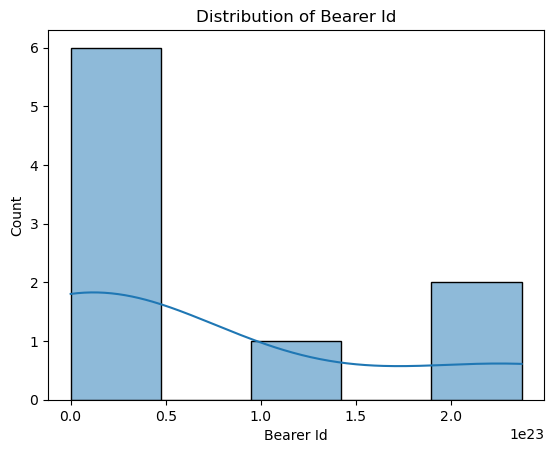

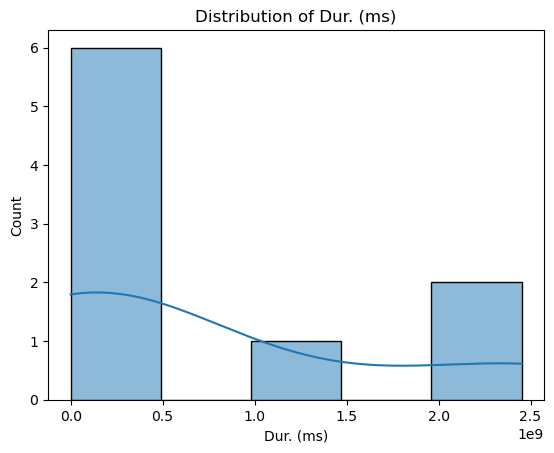

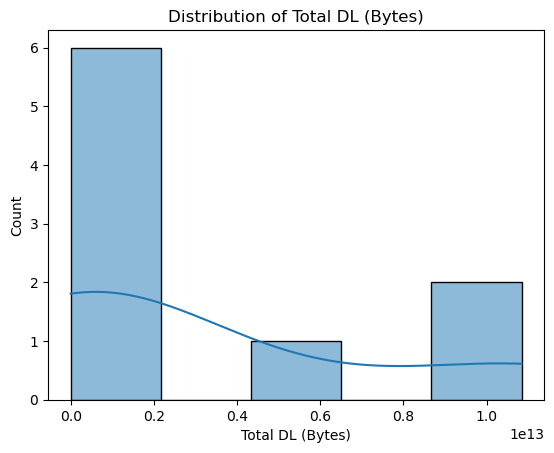

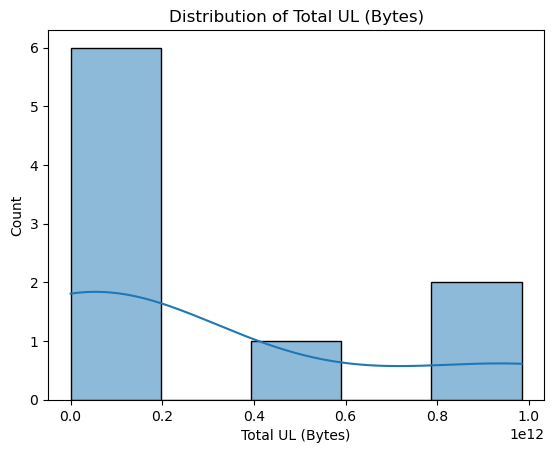

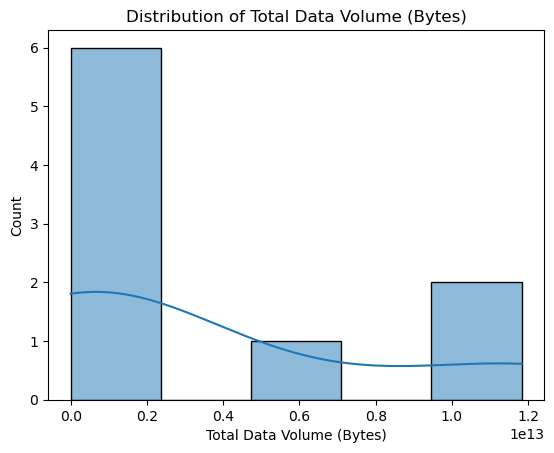

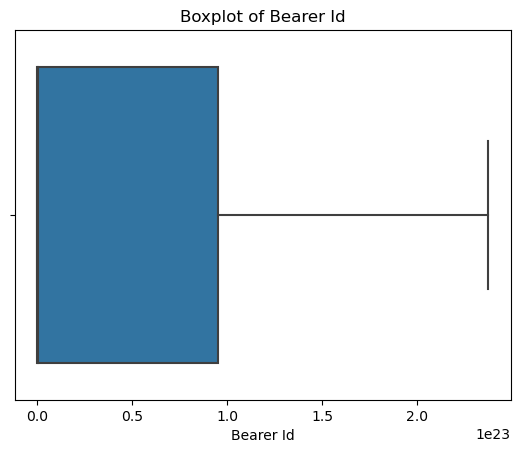

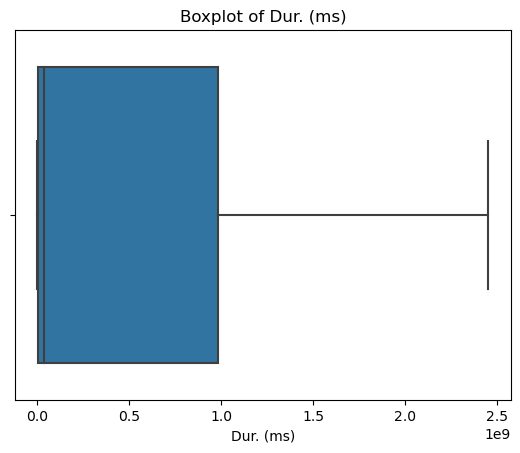

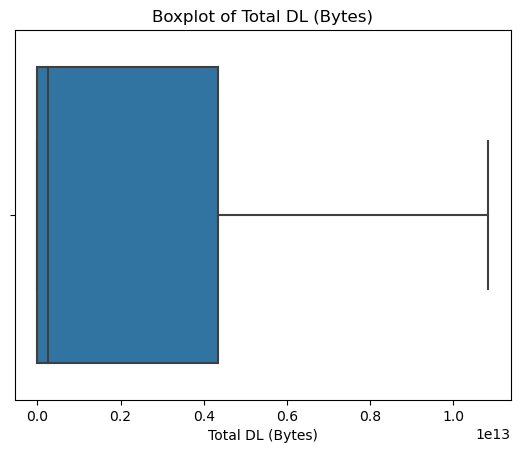

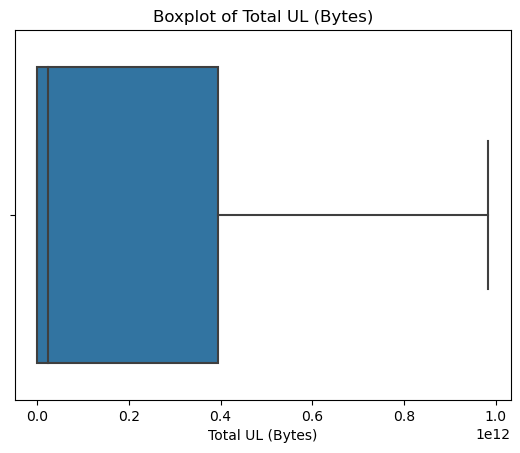

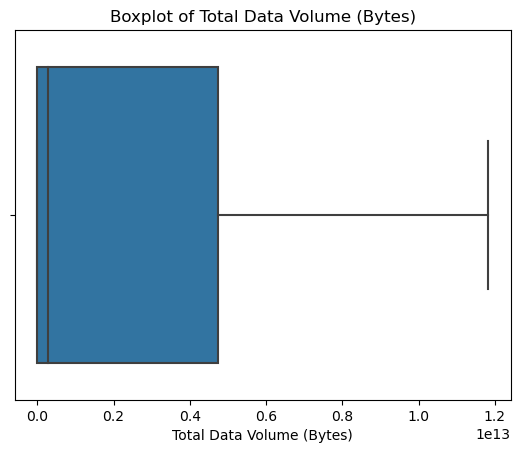

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for each quantitative variable
for col in columns_to_check:
    plt.figure()
    sns.histplot(user_behavior[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Boxplot for each quantitative variable
for col in columns_to_check:
    plt.figure()
    sns.boxplot(x=user_behavior[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


# Bivariate Analysis

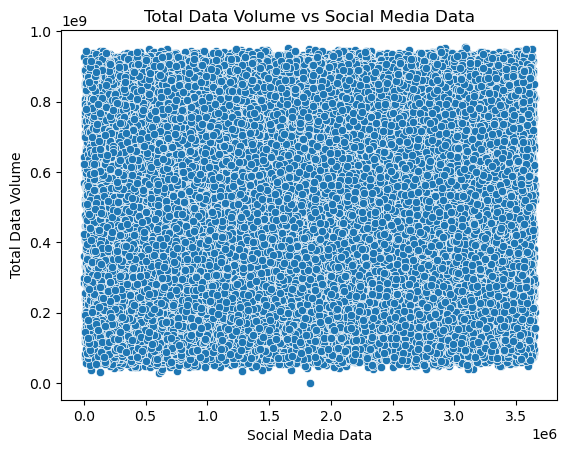

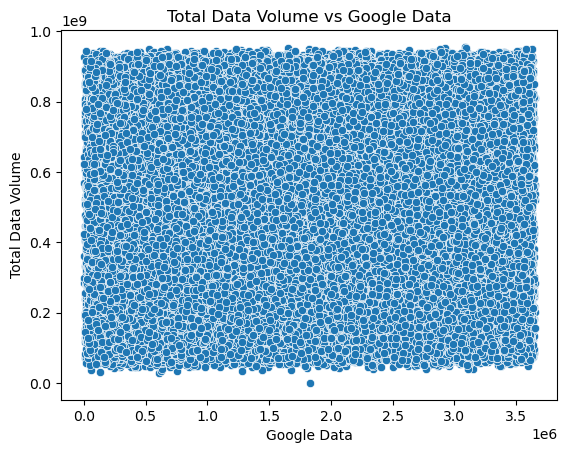

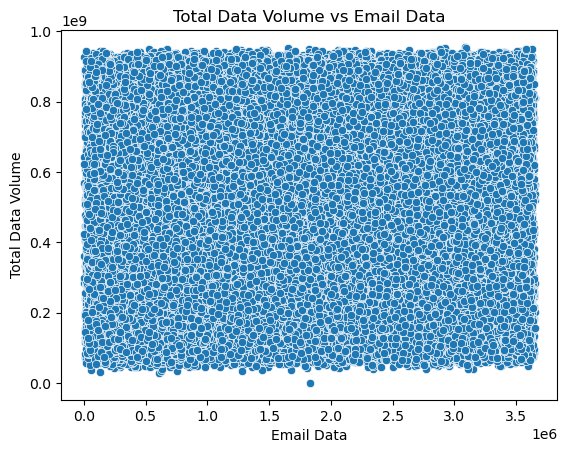

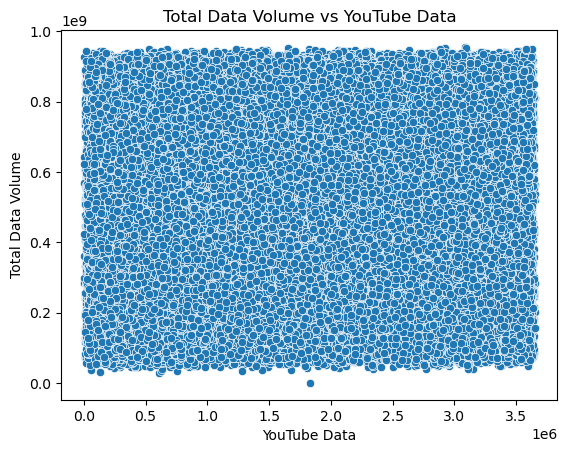

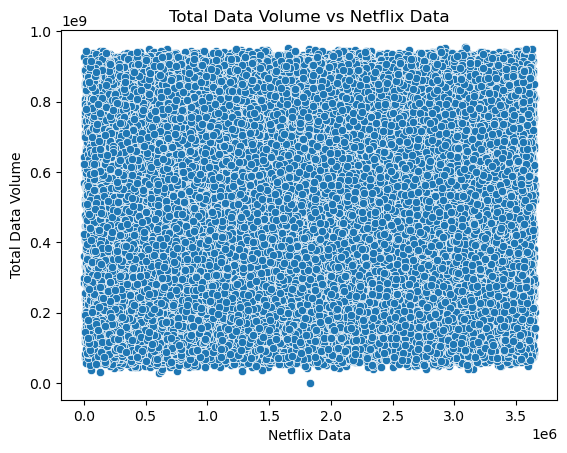

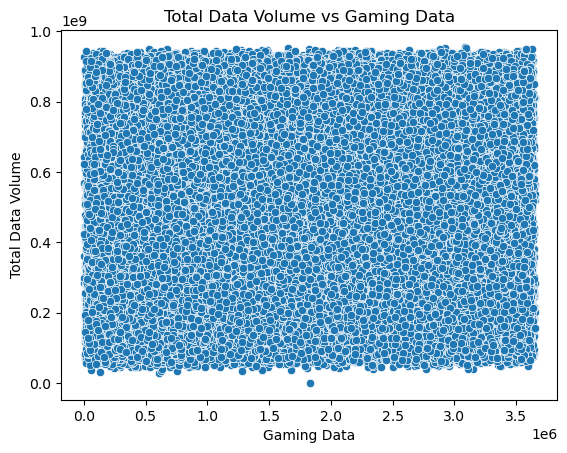

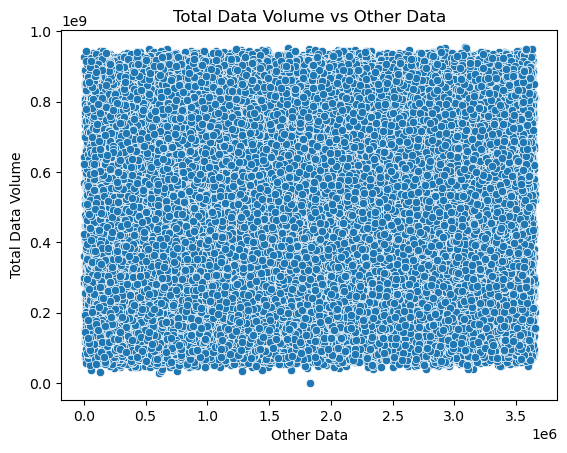

In [61]:
# Scatter plot to explore the relationship between each application data and total data volume
applications = ['Social Media', 'Google', 'Email', 'YouTube', 'Netflix', 'Gaming', 'Other']

for app in applications:
    plt.figure()
    sns.scatterplot(x=Telecom_data[f'Social Media'], y=Telecom_data['Total Data Volume (Bytes)'])
    plt.title(f'Total Data Volume vs {app} Data')
    plt.xlabel(f'{app} Data')
    plt.ylabel('Total Data Volume')
    plt.show()


# Variable Transformations

### Segment users into top five decile classes based on session duration and compute total data per decile class.

In [62]:
# Segment users into deciles based on session duration
user_behavior['decile'] = pd.qcut(user_behavior['Dur. (ms)'], 5, labels=False)

# Compute total data per decile class
decile_data = user_behavior.groupby('decile')['Total Data Volume (Bytes)'].sum().reset_index()
print(decile_data)


   decile  Total Data Volume (Bytes)
0       0               1.540219e+09
1       1               3.712776e+08
2       2               2.815223e+11
3       3               6.475212e+12
4       4               2.365310e+13


# Correlation Analysis

              Social Media    Google     Email   Youtube   Netflix    Gaming  \
Social Media      1.000000 -0.001708  0.004032  0.000548  0.001013  0.001082   
Google           -0.001708  1.000000 -0.000412  0.002277 -0.001902 -0.000994   
Email             0.004032 -0.000412  1.000000 -0.002919  0.001029 -0.000644   
Youtube           0.000548  0.002277 -0.002919  1.000000  0.002882 -0.002999   
Netflix           0.001013 -0.001902  0.001029  0.002882  1.000000 -0.003109   
Gaming            0.001082 -0.000994 -0.000644 -0.002999 -0.003109  1.000000   
Other             0.006065 -0.001727 -0.001299  0.002969 -0.009033 -0.002661   

                 Other  
Social Media  0.006065  
Google       -0.001727  
Email        -0.001299  
Youtube       0.002969  
Netflix      -0.009033  
Gaming       -0.002661  
Other         1.000000  


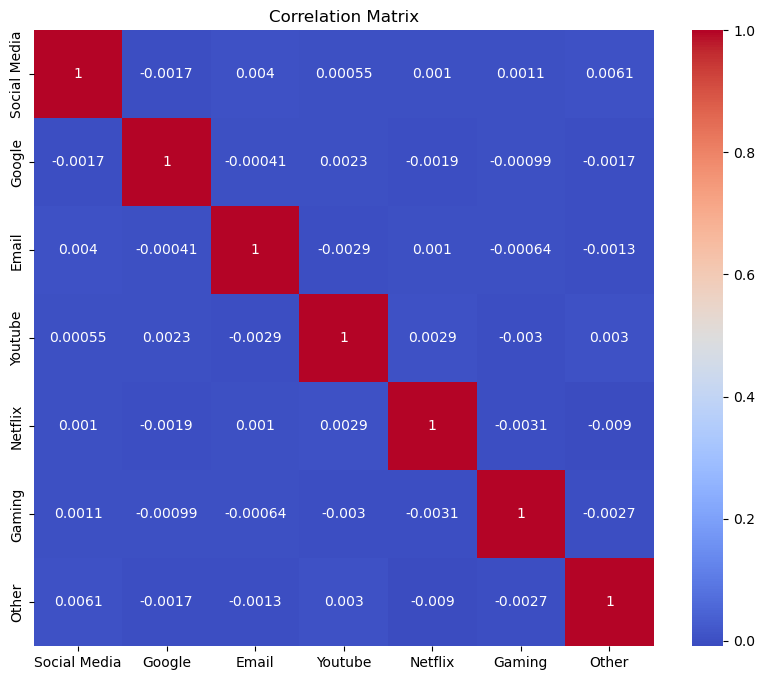

In [63]:
# Compute correlation matrix
correlation_matrix = Telecom_data[['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']].corr()
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Dimensionality Reduction using PCA

   principal_component_1  principal_component_2
0              -0.507459              -1.227157
1              -0.223792               1.207905
2              -0.150548               0.991291
3               1.065456               1.090465
4               0.464388               0.904321


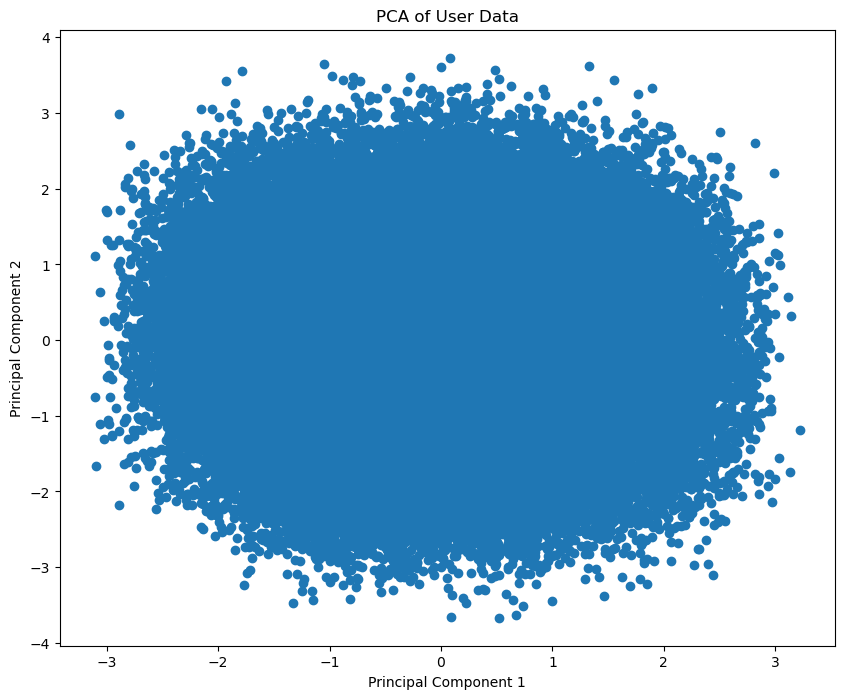

Explained variance ratio: [0.14435994 0.14375118]


In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data before PCA
features = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
x = StandardScaler().fit_transform(Telecom_data[features])

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Create a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])
print(pca_df.head())

# Plotting the PCA results
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['principal_component_1'], pca_df['principal_component_2'])
plt.title('PCA of User Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Interpretation of PCA
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')


# Task 2

# Aggregate Engagement Metrics

### Aggregate the engagement metrics per customer id (MSISDN).

In [65]:
# Aggregate metrics per customer
engagement_metrics = Telecom_data.groupby('MSISDN/Number').agg({
    'Bearer Id': 'sum',
    'Dur. (ms)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

In [66]:
# Calculate total traffic
engagement_metrics['total_traffic'] = engagement_metrics['Total DL (Bytes)'] + engagement_metrics['Total UL (Bytes)']

In [67]:
# Top 10 customers per engagement metric
top_10_session_count = engagement_metrics.nlargest(10, 'Bearer Id')
top_10_session_duration = engagement_metrics.nlargest(10, 'Dur. (ms)')
top_10_total_traffic = engagement_metrics.nlargest(10, 'total_traffic')

print('Top 10 Customers by Session Count')
print(top_10_session_count)
print('\nTop 10 Customers by session Duration')
print(top_10_session_duration)
print('\nTop 10 Customer by Total Traffic')
print(top_10_total_traffic)

Top 10 Customers by Session Count
       MSISDN/Number     Bearer Id     Dur. (ms)  Total DL (Bytes)  \
0       7.106619e-01  3.939321e+21  7.244640e+07      4.869236e+11   
13181   3.362578e+10  2.217929e+20  1.855375e+07      7.770043e+09   
37053   3.365973e+10  2.088226e+20  4.035428e+06      7.081602e+09   
92924   3.376054e+10  1.963570e+20  9.279434e+06      7.811295e+09   
76364   3.367588e+10  1.960686e+20  4.865947e+06      7.309542e+09   
65119   3.366716e+10  1.695512e+20  8.744914e+06      5.052068e+09   
13995   3.362708e+10  1.568693e+20  4.703516e+06      5.309479e+09   
92578   3.376041e+10  1.567972e+20  5.321667e+06      6.610852e+09   
35437   3.365936e+10  1.435385e+20  2.671855e+06      4.255728e+09   
70961   3.366907e+10  1.434664e+20  6.108010e+05      3.477886e+09   

       Total UL (Bytes)  total_traffic  
0          4.432530e+10   5.312489e+11  
13181      7.295774e+08   8.499621e+09  
37053      6.242603e+08   7.705863e+09  
92924      7.034786e+08   8.514

# Normalize Metrics and Run K-means Clustering

### Normalize the metrics and apply K-means clustering with k=3.

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize the metrics
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics[['Bearer Id', 'Dur. (ms)', 'total_traffic']])

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_metrics['cluster'] = kmeans.fit_predict(normalized_metrics)

print(engagement_metrics.head())

   MSISDN/Number     Bearer Id     Dur. (ms)  Total DL (Bytes)  \
0   7.106619e-01  3.939321e+21  7.244640e+07      4.869236e+11   
1   3.360100e+10  1.311450e+19  1.167200e+05      8.426375e+08   
2   3.360100e+10  7.349880e+18  1.812300e+05      1.207552e+08   
3   3.360100e+10  7.349880e+18  1.349690e+05      5.566597e+08   
4   3.360101e+10  1.304240e+19  4.987800e+04      4.019932e+08   

   Total UL (Bytes)  total_traffic  cluster  
0      4.432530e+10   5.312489e+11        2  
1      3.605311e+07   8.786906e+08        1  
2      3.610446e+07   1.568596e+08        1  
3      3.930682e+07   5.959665e+08        1  
4      2.032753e+07   4.223207e+08        1  


# Compute Cluster Statistics

### Compute the minimum, maximum, average, and total metrics for each cluster.

In [69]:
cluster_stats = engagement_metrics.groupby('cluster').agg({
    'Bearer Id': ['min', 'max', 'mean', 'sum'],
    'Dur. (ms)': ['min', 'max', 'mean', 'sum'],
    'total_traffic': ['min', 'max', 'mean', 'sum']
}).reset_index()

print(cluster_stats)


  cluster     Bearer Id                                            \
                    min           max          mean           sum   
0       0  7.277830e+18  2.217929e+20  3.369405e+19  5.374201e+23   
1       1  6.606623e-01  2.637300e+19  1.066413e+19  9.694338e+23   
2       2  3.939321e+21  3.939321e+21  3.939321e+21  3.939321e+21   

      Dur. (ms)                                           total_traffic  \
            min           max          mean           sum           min   
0  3.195800e+04  1.855375e+07  3.531848e+05  5.633298e+09  5.714004e+07   
1  7.142000e+03  7.804710e+05  1.098447e+05  9.985540e+09  3.324901e+07   
2  7.244640e+07  7.244640e+07  7.244640e+07  7.244640e+07  5.312489e+11   

                                             
            max          mean           sum  
0  8.846226e+09  1.412846e+09  2.253490e+13  
1  2.069444e+09  5.643032e+08  5.129855e+13  
2  5.312489e+11  5.312489e+11  5.312489e+11  


# Aggregate User Total Traffic per Application

### Aggregate user total traffic per application and derive the top 10 most engaged users per application.

In [70]:
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']

# Aggregate total traffic per application
app_traffic = Telecom_data.groupby('MSISDN/Number')[applications].sum().reset_index()

# Top 10 users per application
top_users_per_app = {}
for app in applications:
    top_users_per_app[app] = app_traffic.nlargest(10, app)

print(top_users_per_app)


{'Social Media':         MSISDN/Number  Social Media        Google         Email       Youtube  \
0        7.106619e-01  1.973817e+09  8.248577e+09  2.399880e+09  2.434073e+10   
13527    3.362632e+10  4.337478e+07  1.521919e+08  4.241878e+07  3.744830e+08   
92924    3.376054e+10  3.978319e+07  1.232231e+08  3.369377e+07  3.962892e+08   
37053    3.365973e+10  3.541236e+07  1.165163e+08  3.599979e+07  2.579911e+08   
6438     3.361489e+10  2.829454e+07  1.279738e+08  4.078863e+07  3.943702e+08   
13181    3.362578e+10  2.713550e+07  1.423079e+08  4.063397e+07  4.529588e+08   
65119    3.366716e+10  2.424785e+07  1.050327e+08  3.033580e+07  3.152313e+08   
106138   3.378632e+10  2.397492e+07  1.102545e+08  3.631012e+07  2.147639e+08   
70961    3.366907e+10  2.380083e+07  7.782468e+07  2.292341e+07  2.364028e+08   
667      3.360313e+10  2.307782e+07  8.692902e+07  2.619890e+07  2.840901e+08   

             Netflix        Gaming         Other  
0       2.425357e+10  4.614780e+11  4.50

# Plot the Top 3 Most Used Applications

### Plot the top 3 most used applications using appropriate charts.

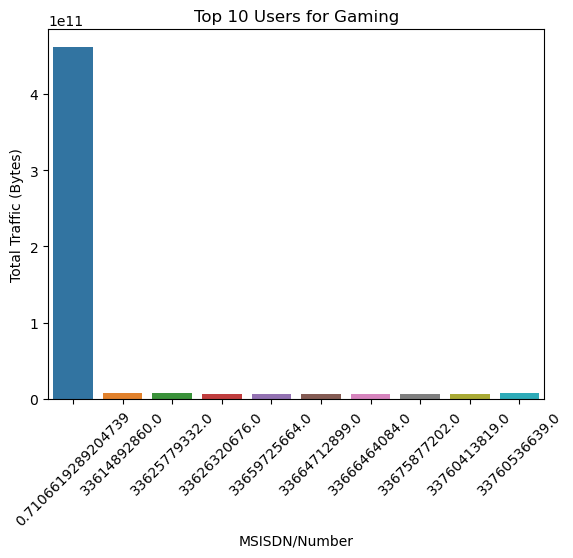

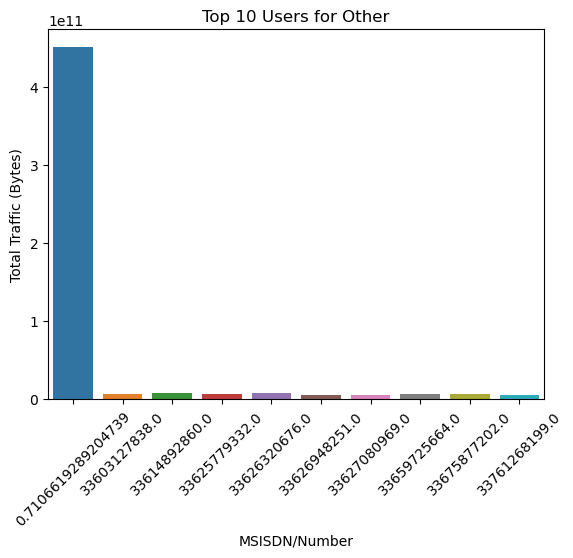

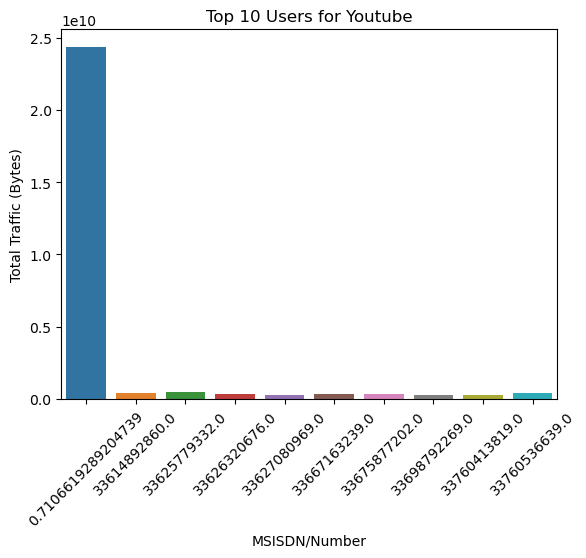

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify top 3 applications by total traffic
total_traffic_per_app = app_traffic[applications].sum().sort_values(ascending=False)
top_3_apps = total_traffic_per_app.index[:3]

# Plot the top 3 applications
for app in top_3_apps:
    plt.figure()
    sns.barplot(x=top_users_per_app[app]['MSISDN/Number'], y=top_users_per_app[app][app])
    plt.title(f'Top 10 Users for {app}')
    plt.xlabel('MSISDN/Number')
    plt.ylabel('Total Traffic (Bytes)')
    plt.xticks(rotation=45)
    plt.show()


# Determine Optimal Value of k Using Elbow Method

### Determine the optimal value of k for K-means clustering using the elbow method.

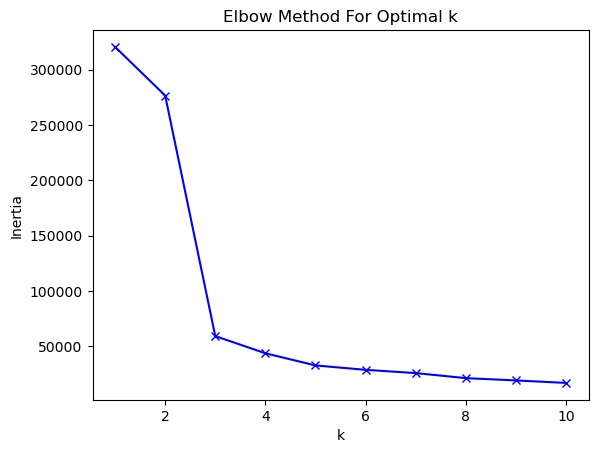

In [72]:
# Elbow method to determine the optimal number of clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_metrics)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure()
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# K-means Clustering with Optimal Number of Clusters

### Based on the elbow method, we'll use the optimal k value for clustering.

In [73]:
# Assuming the optimal number of clusters is determined to be 3 from the elbow method
optimal_k = 3

# Apply K-means clustering with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
engagement_metrics['optimal_cluster'] = kmeans_optimal.fit_predict(normalized_metrics)

# Compute cluster statistics for the optimal clusters
optimal_cluster_stats = engagement_metrics.groupby('optimal_cluster').agg({
    'Bearer Id': ['min', 'max', 'mean', 'sum'],
    'Dur. (ms)': ['min', 'max', 'mean', 'sum'],
    'total_traffic': ['min', 'max', 'mean', 'sum']
}).reset_index()

print(optimal_cluster_stats)

  optimal_cluster     Bearer Id                                            \
                            min           max          mean           sum   
0               0  7.277830e+18  2.217929e+20  3.369405e+19  5.374201e+23   
1               1  6.606623e-01  2.637300e+19  1.066413e+19  9.694338e+23   
2               2  3.939321e+21  3.939321e+21  3.939321e+21  3.939321e+21   

      Dur. (ms)                                           total_traffic  \
            min           max          mean           sum           min   
0  3.195800e+04  1.855375e+07  3.531848e+05  5.633298e+09  5.714004e+07   
1  7.142000e+03  7.804710e+05  1.098447e+05  9.985540e+09  3.324901e+07   
2  7.244640e+07  7.244640e+07  7.244640e+07  7.244640e+07  5.312489e+11   

                                             
            max          mean           sum  
0  8.846226e+09  1.412846e+09  2.253490e+13  
1  2.069444e+09  5.643032e+08  5.129855e+13  
2  5.312489e+11  5.312489e+11  5.312489e+11  


# Interpretation and Visualization

### Interpret the results visually with accompanying text explaining your findings.

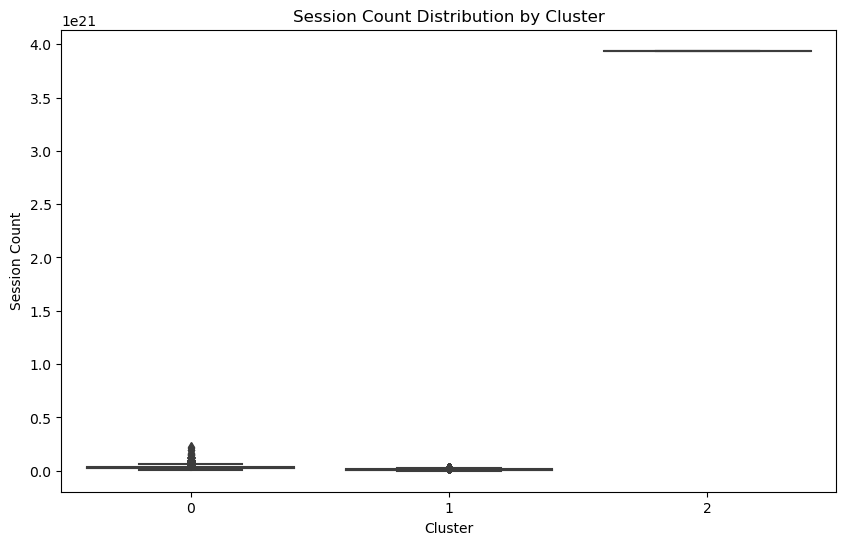

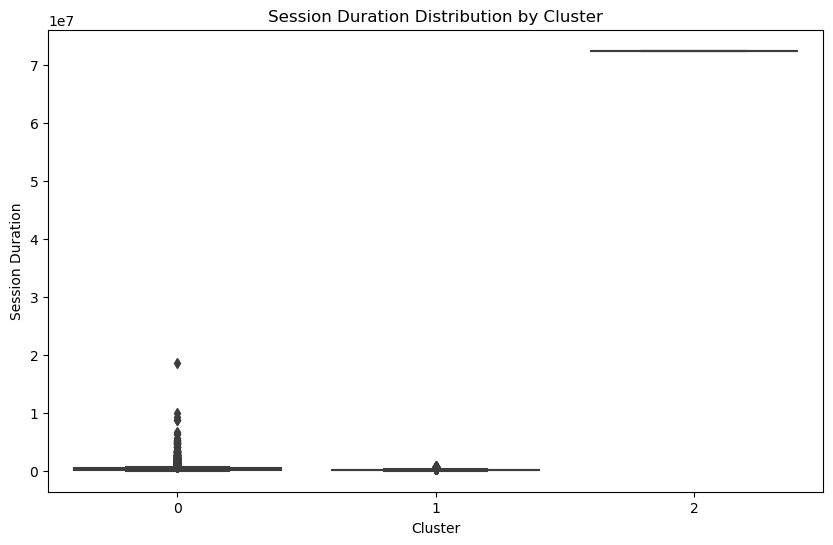

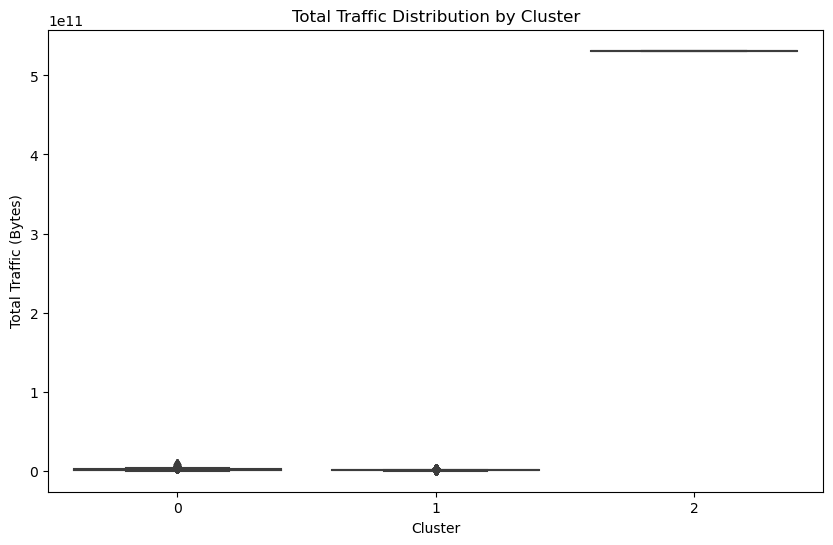

In [74]:
# Visualizing the engagement metrics distribution per cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='optimal_cluster', y='Bearer Id', data=engagement_metrics)
plt.title('Session Count Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Session Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='optimal_cluster', y='Dur. (ms)', data=engagement_metrics)
plt.title('Session Duration Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Session Duration')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='optimal_cluster', y='total_traffic', data=engagement_metrics)
plt.title('Total Traffic Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Traffic (Bytes)')
plt.show()

# Slide Creation

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Save plots as images for inclusion in slides
for app in top_3_apps:
    plt.figure()
    sns.barplot(x=top_users_per_app[app]['MSISDN/Number'], y=top_users_per_app[app][app])
    plt.title(f'Top 10 Users for {app}')
    plt.xlabel('MSISDN/Number')
    plt.ylabel('Total Traffic (Bytes)')
    plt.xticks(rotation=45)
    plt.savefig(f'top_10_users_{app}.png')
    plt.close()

# Save cluster boxplots as images
plt.figure(figsize=(10, 6))
sns.boxplot(x='optimal_cluster', y='Bearer Id', data=engagement_metrics)
plt.title('Session Count Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Session Count')
plt.savefig('session_count_distribution.png')
plt.close()

plt.figure(figsize=(10, 6))
sns.boxplot(x='optimal_cluster', y='Dur. (ms)', data=engagement_metrics)
plt.title('Session Duration Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Session Duration')
plt.savefig('session_duration_distribution.png')
plt.close()

plt.figure(figsize=(10, 6))
sns.boxplot(x='optimal_cluster', y='total_traffic', data=engagement_metrics)
plt.title('Total Traffic Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Traffic (Bytes)')
plt.savefig('total_traffic_distribution.png')
plt.close()

# Task 3

# Handle Missing Values and Outliers

### Replace missing values and outliers with the mean (for numerical variables) or the mode (for categorical variables).

In [76]:
Telecom_data['avg_TCP_retransmission'] = Telecom_data['TCP DL Retrans. Vol (Bytes)'] + Telecom_data['TCP UL Retrans. Vol (Bytes)']
Telecom_data['avg_RTT'] = Telecom_data['Avg RTT DL (ms)'] + Telecom_data['Avg RTT UL (ms)']
Telecom_data['avg_throughput'] = Telecom_data['Avg Bearer TP DL (kbps)'] + Telecom_data['Avg Bearer TP UL (kbps)']

In [77]:
for column in ['avg_TCP_retransmission','avg_RTT','avg_throughput','Handset Type']:
    if Telecom_data[column].dtype == 'object':
        Telecom_data[column].fillna(Telecom_data[column].mode()[0], inplace=True)
    else:
        Telecom_data[column].fillna(Telecom_data[column].mean(), inplace=True)

In [78]:
for column in ['avg_TCP_retransmission','avg_RTT','avg_throughput']:
    mean_value = Telecom_data[column].mean()
    std_dev = Telecom_data[column].std()
    Telecom_data[column] = Telecom_data[column].apply(lambda x: mean_value if (x > mean_value + 3*std_dev or x < mean_value - 3*std_dev) else x)

# Aggregate Information Per Customer

### Aggregate the required information per customer.

In [79]:
# Aggregate information per customer
user_experience = Telecom_data.groupby('MSISDN/Number').agg({
    'avg_TCP_retransmission': 'mean',
    'avg_RTT': 'mean',
    'avg_throughput': 'mean',
    'Handset Type': lambda x: x.mode()[0]  # Most frequent handset type
})

# Compute and List Top, Bottom, and Most Frequent Values

### Compute and list the top, bottom, and most frequent TCP, RTT, and throughput values.

In [80]:
# Top 10, Bottom 10, and Most Frequent TCP values
top_10_tcp = user_experience['avg_TCP_retransmission'].nlargest(10)
bottom_10_tcp = user_experience['avg_TCP_retransmission'].nsmallest(10)
most_freq_tcp = user_experience['avg_TCP_retransmission'].mode().head(10)

# Top 10, Bottom 10, and Most Frequent RTT values
top_10_rtt = user_experience['avg_RTT'].nlargest(10)
bottom_10_rtt = user_experience['avg_RTT'].nsmallest(10)
most_freq_rtt = user_experience['avg_RTT'].mode().head(10)

# Top 10, Bottom 10, and Most Frequent Throughput values
top_10_throughput = user_experience['avg_throughput'].nlargest(10)
bottom_10_throughput = user_experience['avg_throughput'].nsmallest(10)
most_freq_throughput = user_experience['avg_throughput'].mode().head(10)

# Print the results
print("Top 10 TCP values:\n", top_10_tcp)
print("Bottom 10 TCP values:\n", bottom_10_tcp)
print("Most Frequent TCP values:\n", most_freq_tcp)

print("Top 10 RTT values:\n", top_10_rtt)
print("Bottom 10 RTT values:\n", bottom_10_rtt)
print("Most Frequent RTT values:\n", most_freq_rtt)

print("Top 10 Throughput values:\n", top_10_throughput)
print("Bottom 10 Throughput values:\n", bottom_10_throughput)
print("Most Frequent Throughput values:\n", most_freq_throughput)

Top 10 TCP values:
 MSISDN/Number
3.376180e+10    363822653.0
3.364886e+10    362212614.0
3.365011e+10    359281607.0
3.365849e+10    355634915.0
3.366519e+10    353207543.0
3.366815e+10    351624669.0
3.366714e+10    345356950.0
3.363184e+10    341358682.0
3.366021e+10    338013478.0
3.366031e+10    335602606.0
Name: avg_TCP_retransmission, dtype: float64
Bottom 10 TCP values:
 MSISDN/Number
3.362713e+10    61.763608
3.365883e+10    61.763608
3.366610e+10    61.763608
3.367041e+10    61.763608
3.367781e+10    61.763608
3.366699e+10    64.763608
3.366827e+10    64.763608
3.366997e+10    64.763608
3.367139e+10    64.763608
3.369909e+10    64.763608
Name: avg_TCP_retransmission, dtype: float64
Most Frequent TCP values:
 0    123.195845
Name: avg_TCP_retransmission, dtype: float64
Top 10 RTT values:
 MSISDN/Number
3.364502e+10    1809.0
3.366203e+10    1809.0
3.366840e+10    1808.0
3.361062e+10    1805.0
3.366372e+10    1800.0
3.365833e+10    1799.0
3.369926e+10    1799.0
3.376356e+10    

# Distribution and Interpretation of Average Throughput and TCP Retransmission per Handset Type

### Compute and report the distribution of average throughput and average TCP retransmission per handset type.

                                           Handset Type  avg_throughput
0                            A-Link Telecom I. Cubot A5    23510.000000
1                     A-Link Telecom I. Cubot Note Plus     6699.000000
2                        A-Link Telecom I. Cubot Note S     8937.000000
3                          A-Link Telecom I. Cubot Nova    56217.000000
4                         A-Link Telecom I. Cubot Power    69468.000000
...                                                 ...             ...
1389  Zte Zte Blade C2 Smartphone Android By Sfr Sta...       58.000000
1390                          Zyxel Communicat. Lte7460    61956.000000
1391                          Zyxel Communicat. Sbg3600    15070.374104
1392                    Zyxel Communicat. Zyxel Wah7706     2173.000000
1393                                          undefined     7135.212085

[1394 rows x 2 columns]
                                           Handset Type  \
0                            A-Link Telecom I. Cubot

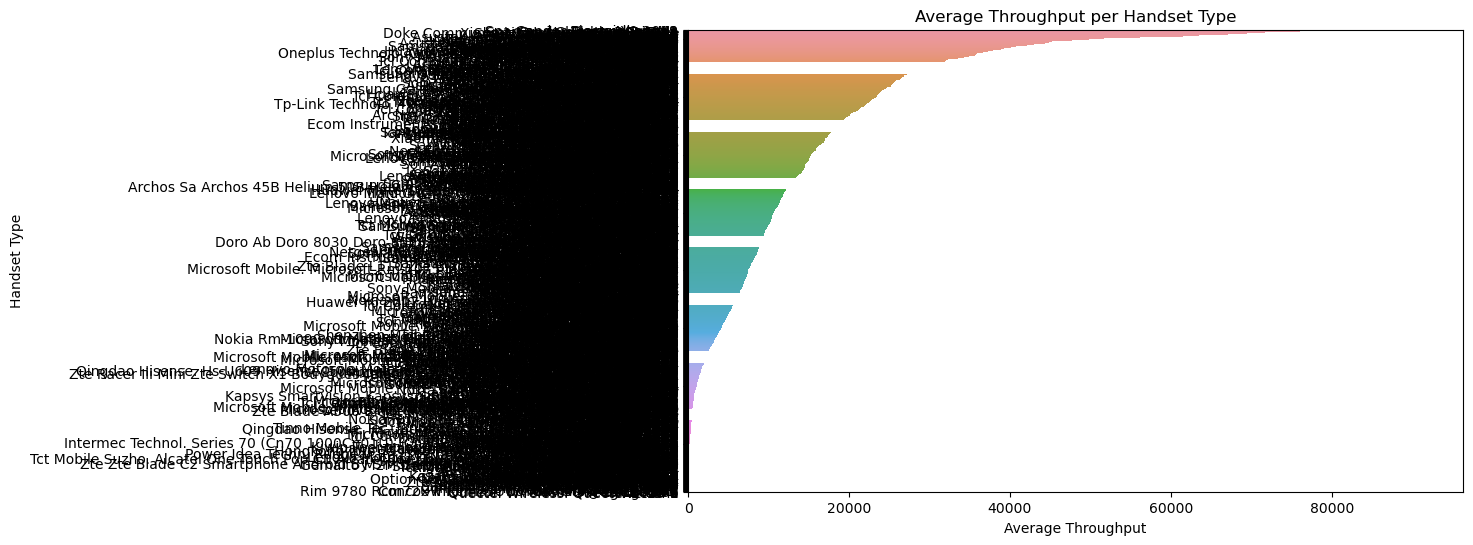

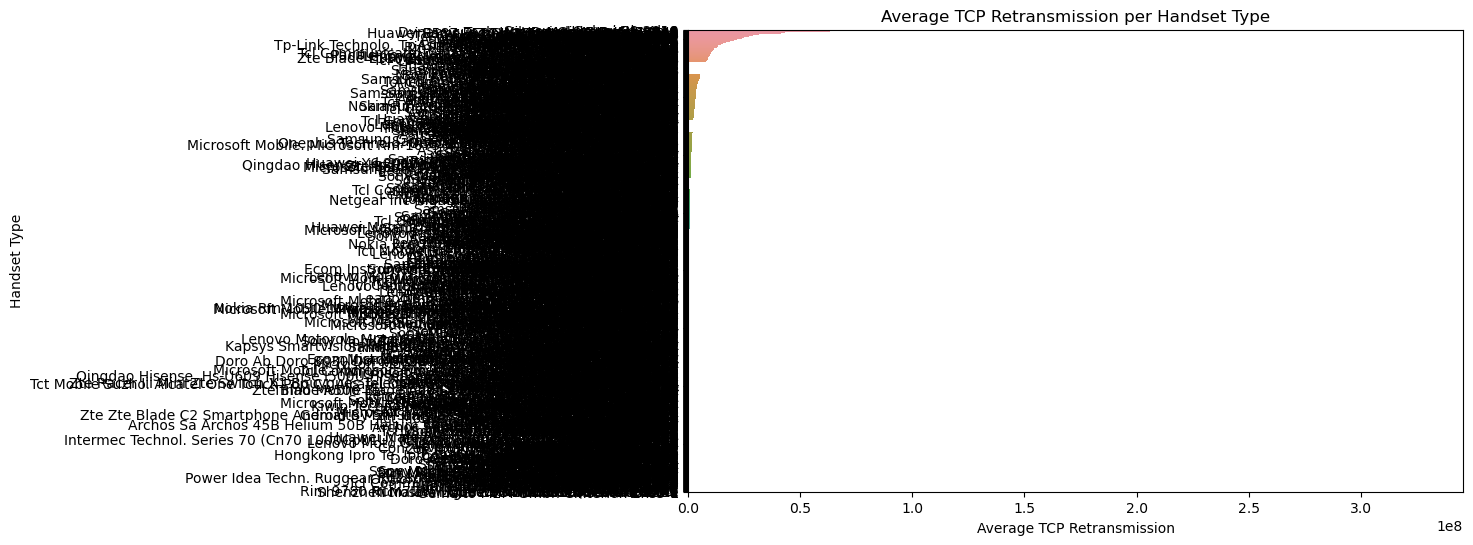

In [81]:
# Distribution of average throughput per handset type
throughput_distribution =  user_experience.groupby('Handset Type')['avg_throughput'].mean().reset_index()
print(throughput_distribution)

# Distribution of average TCP retransmission per handset type
tcp_retransmission_distribution =  user_experience.groupby('Handset Type')['avg_TCP_retransmission'].mean().reset_index()
print(tcp_retransmission_distribution)

# Plotting the distributions
import matplotlib.pyplot as plt
import seaborn as sns

# Average throughput per handset type
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_throughput', y='Handset Type', data=throughput_distribution.sort_values('avg_throughput', ascending=False))
plt.title('Average Throughput per Handset Type')
plt.xlabel('Average Throughput')
plt.ylabel('Handset Type')
plt.show()

# Average TCP retransmission per handset type
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_TCP_retransmission', y='Handset Type', data=tcp_retransmission_distribution.sort_values('avg_TCP_retransmission', ascending=False))
plt.title('Average TCP Retransmission per Handset Type')
plt.xlabel('Average TCP Retransmission')
plt.ylabel('Handset Type')
plt.show()


# K-means Clustering for Experience Segmentation

### Using the experience metrics, perform K-means clustering to segment users into groups and describe each cluster.

In [82]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Normalize the relevant metrics
scaler = MinMaxScaler()
normalized_metrics = scaler.fit_transform(user_experience[['avg_TCP_retransmission', 'avg_RTT', 'avg_throughput']])

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
user_experience['cluster'] = kmeans.fit_predict(normalized_metrics)

# Compute cluster statistics
cluster_stats = user_experience.groupby('cluster').agg({
    'avg_TCP_retransmission': ['min', 'max', 'mean', 'sum'],
    'avg_RTT': ['min', 'max', 'mean', 'sum'],
    'avg_throughput': ['min', 'max', 'mean', 'sum']
})

print("Cluster Statistics:\n", cluster_stats)

Cluster Statistics:
         avg_TCP_retransmission                                           \
                           min          max          mean           sum   
cluster                                                                   
0                    68.432237  282033437.0  5.241843e+06  1.179939e+10   
1                    61.763608  353207543.0  1.004750e+06  8.486322e+10   
2                    61.763608  363822653.0  9.185908e+06  1.850409e+11   

        avg_RTT                                   avg_throughput           \
            min     max        mean           sum            min      max   
cluster                                                                     
0         449.0  1809.0  873.095709  1.965338e+06            0.0  73829.0   
1           0.0   475.0   62.302744  5.262214e+06            0.0  24223.5   
2          17.5  1083.0   99.870332  2.011788e+06        20296.0  95525.0   

                                     
                 mean      

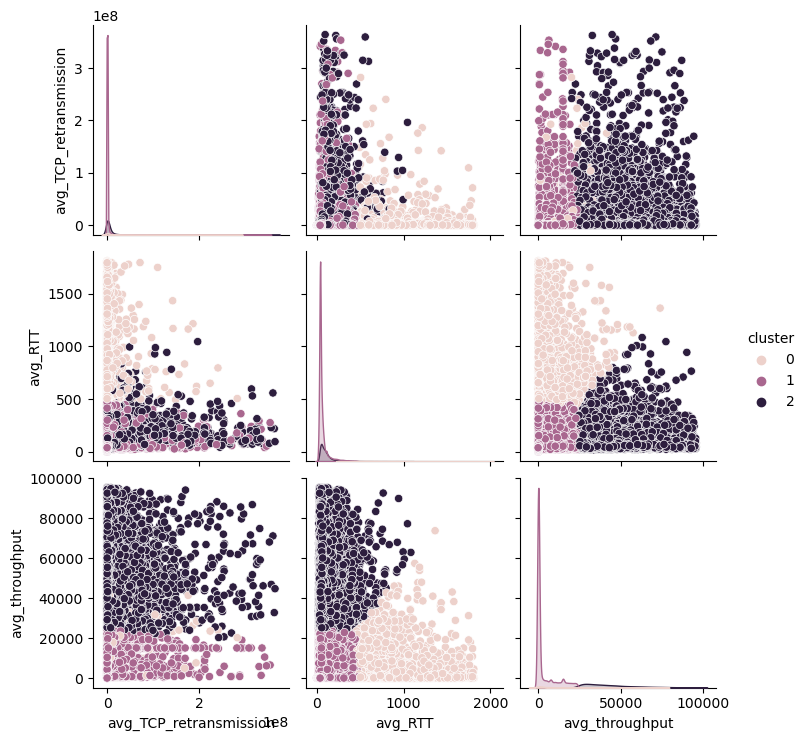

Cluster 0 Description:
 - Number of Customers: 2251
 - Average TCP Retransmission: 5241843.285377264
 - Average RTT: 873.0957093013751
 - Average Throughput: 6579.0342729806

Cluster 1 Description:
 - Number of Customers: 84462
 - Average TCP Retransmission: 1004750.2483647128
 - Average RTT: 62.30274410467977
 - Average Throughput: 3448.5784881506593

Cluster 2 Description:
 - Number of Customers: 20144
 - Average TCP Retransmission: 9185907.5456005
 - Average RTT: 99.87033231954271
 - Average Throughput: 44656.85596625438



In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot cluster distribution
sns.pairplot(user_experience, hue='cluster', vars=['avg_TCP_retransmission', 'avg_RTT', 'avg_throughput'])
plt.show()

# Description of each cluster
for i in range(3):
    cluster = user_experience[user_experience['cluster'] == i]
    print(f"Cluster {i} Description:")
    print(f" - Number of Customers: {len(cluster)}")
    print(f" - Average TCP Retransmission: {cluster['avg_TCP_retransmission'].mean()}")
    print(f" - Average RTT: {cluster['avg_RTT'].mean()}")
    print(f" - Average Throughput: {cluster['avg_throughput'].mean()}")
    print()


  experience_cluster avg_TCP_retransmission                              \
                                        min           max          mean   
0                  0              68.432237  3.638227e+08  3.979236e+07   
1                  1              61.763608  7.456777e+07  5.013607e+05   
2                  2              61.763608  9.819338e+07  5.924268e+06   

                avg_RTT                                   avg_throughput  \
            sum     min     max        mean           sum            min   
0  1.224013e+11    26.0  1809.0  688.977207  2.119294e+06            0.0   
1  4.211430e+10     0.0   511.0   61.779876  5.189510e+06            0.0   
2  1.171879e+11    17.5   622.0   97.595537  1.930537e+06         9908.0   

                                        
       max          mean           sum  
0  94192.0  15773.762716  4.852009e+07  
1  25231.0   3368.240052  2.829322e+08  
2  95525.0  44193.857262  8.741987e+08  


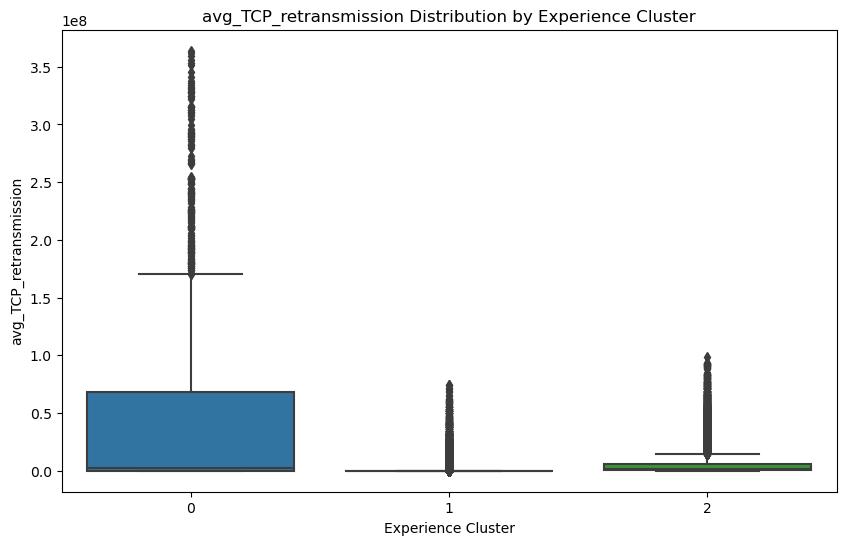

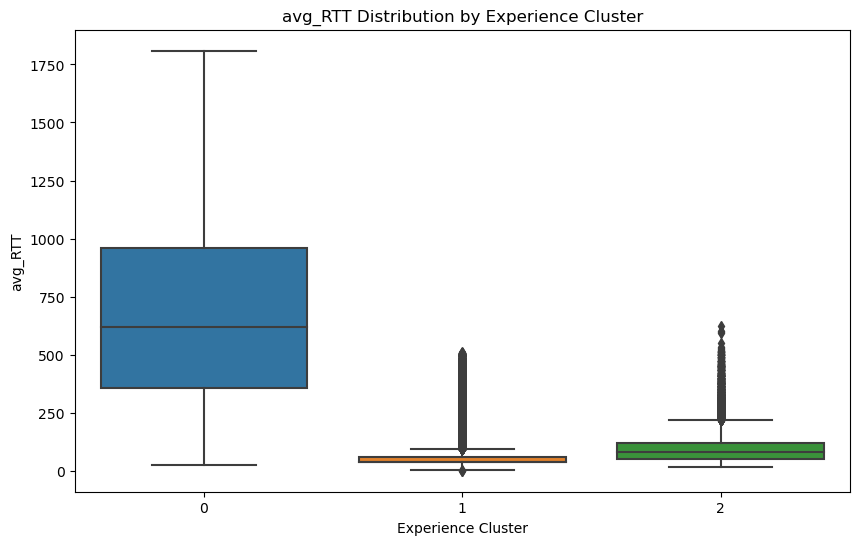

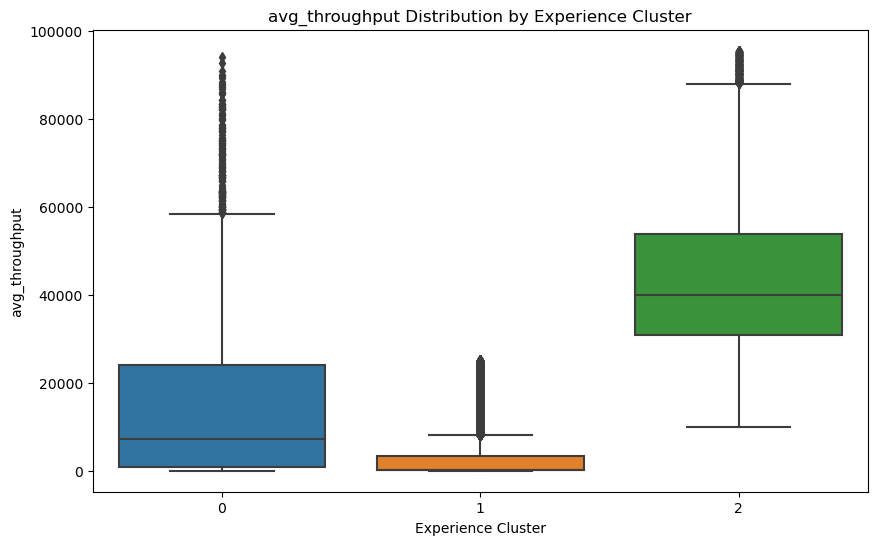

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize the data
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(user_experience[['avg_TCP_retransmission', 'avg_RTT', 'avg_throughput']])

# Apply K-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
user_experience['experience_cluster'] = kmeans.fit_predict(normalized_metrics)

# Compute cluster statistics
cluster_stats = user_experience.groupby('experience_cluster').agg({
    'avg_TCP_retransmission': ['min', 'max', 'mean', 'sum'],
    'avg_RTT': ['min', 'max', 'mean', 'sum'],
    'avg_throughput': ['min', 'max', 'mean', 'sum']
}).reset_index()

print(cluster_stats)

# Plotting cluster statistics
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_cluster', y='avg_TCP_retransmission', data=user_experience)
plt.title('avg_TCP_retransmission Distribution by Experience Cluster')
plt.xlabel('Experience Cluster')
plt.ylabel('avg_TCP_retransmission')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_cluster', y='avg_RTT', data=user_experience)
plt.title('avg_RTT Distribution by Experience Cluster')
plt.xlabel('Experience Cluster')
plt.ylabel('avg_RTT')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_cluster', y='avg_throughput', data=user_experience)
plt.title('avg_throughput Distribution by Experience Cluster')
plt.xlabel('Experience Cluster')
plt.ylabel('avg_throughput')
plt.show()


# Task 4

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.linear_model import LinearRegression

# Calculate Engagement and Experience Scores

### Calculate the Euclidean distance between the user data point and the less engaged cluster from the first clustering.

In [86]:
# Assuming the first clustering results are stored in engagement_metrics['cluster']
# Get the cluster center for the less engaged cluster (cluster 0 for example)
less_engaged_cluster_center = kmeans.cluster_centers_[0]

# Calculate the Euclidean distance for engagement score
scaler = StandardScaler()
normalized_engagement = scaler.fit_transform(engagement_metrics[['Bearer Id','Dur. (ms)','total_traffic']])
engagement_scores = pairwise_distances(normalized_engagement, [less_engaged_cluster_center], metric='euclidean').flatten()

engagement_metrics['engagement_score'] = engagement_scores
print(engagement_metrics[['MSISDN/Number', 'engagement_score']].head())


   MSISDN/Number  engagement_score
0   7.106619e-01        465.630081
1   3.360100e+10          5.074969
2   3.360100e+10          5.119433
3   3.360100e+10          5.227124
4   3.360101e+10          5.289312


# Experience Score

### Calculate the Euclidean distance between the user data point and the worst experience cluster.

In [87]:
# Assuming the second clustering results are stored in user_experience['experience_cluster']
# Get the cluster center for the worst experience cluster (cluster 0 for example)
worst_experience_cluster_center = kmeans_optimal.cluster_centers_[0]

# Calculate the Euclidean distance for experience score
normalized_experience = scaler.fit_transform(user_experience[['avg_TCP_retransmission', 'avg_RTT', 'avg_throughput']])
experience_scores = pairwise_distances(normalized_experience, [worst_experience_cluster_center], metric='euclidean').flatten()

user_experience['experience_score'] = experience_scores
print(user_experience[['experience_score']].head())


               experience_score
MSISDN/Number                  
7.106619e-01           1.255314
3.360100e+10           1.997929
3.360100e+10           2.051418
3.360100e+10           2.029002
3.360101e+10           1.875141


# Calculate Satisfaction Score

### The satisfaction score is the average of both engagement and experience scores.

In [88]:
# Merge engagement and experience data
user_scores = pd.merge(engagement_metrics[['MSISDN/Number', 'engagement_score']], user_experience[['experience_score']], on='MSISDN/Number')

# Calculate satisfaction score
user_scores['satisfaction_score'] = user_scores[['engagement_score', 'experience_score']].mean(axis=1)
print(user_scores[['MSISDN/Number', 'satisfaction_score']].head())

# Top 10 satisfied customers
top_10_satisfied_customers = user_scores.nlargest(10, 'satisfaction_score')
print(top_10_satisfied_customers)


   MSISDN/Number  satisfaction_score
0   7.106619e-01          233.442698
1   3.360100e+10            3.536449
2   3.360100e+10            3.585426
3   3.360100e+10            3.628063
4   3.360101e+10            3.582227
       MSISDN/Number  engagement_score  experience_score  satisfaction_score
0       7.106619e-01        465.630081          1.255314          233.442698
13181   3.362578e+10         60.477204          1.784804           31.131004
6438    3.361489e+10         30.383401          1.715966           16.049683
92924   3.376054e+10         29.059725          1.609599           15.334662
96373   3.376180e+10          5.368938         23.969608           14.669273
23389   3.365011e+10          5.384774         23.912387           14.648581
22441   3.364886e+10          5.181140         23.821049           14.501094
31321   3.365849e+10          5.465341         23.400910           14.433125
59039   3.366519e+10          5.597289         23.199860           14.398574
68198   

In [89]:
user_scores.to_csv('user_scores.csv',index = False)

# Predict Satisfaction Score with a Regression Model

### Use a regression model to predict the satisfaction score.

In [90]:
# Prepare the data for regression
X = user_scores[['engagement_score', 'experience_score']]
y = user_scores['satisfaction_score']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Train a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict satisfaction scores
y_pred = regressor.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(X)
print(y)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

        engagement_score  experience_score
0             465.630081          1.255314
1               5.074969          1.997929
2               5.119433          2.051418
3               5.227124          2.029002
4               5.289312          1.875141
...                  ...               ...
106852          5.401951          1.742570
106853          5.015513          2.017994
106854          3.498040          2.031626
106855          4.900014          2.030750
106856          3.519230          2.031598

[106857 rows x 2 columns]
0         233.442698
1           3.536449
2           3.585426
3           3.628063
4           3.582227
             ...    
106852      3.572260
106853      3.516754
106854      2.764833
106855      3.465382
106856      2.775414
Name: satisfaction_score, Length: 106857, dtype: float64
Mean Squared Error: 3.0157172051665597e-31
R-squared: 1.0


In [91]:
X_test

engagement_score  experience_score
65247          4.290890          2.038813
167            5.185995          1.201267
46807          5.580294          1.975854
79807          5.161725          2.028021
78455          4.800687          2.031242
...                 ...               ...
89036          5.134216          2.028756
75633          5.128006          1.975661
33017          5.561241          2.080627
72457          5.311330          2.033777
16946          4.312463          1.972754

[21372 rows x 2 columns]

In [92]:
y_test

65247    3.164851
167      3.193631
46807    3.778074
79807    3.594873
78455    3.415965
           ...   
89036    3.581486
75633    3.551833
33017    3.820934
72457    3.672554
16946    3.142609
Name: satisfaction_score, Length: 21372, dtype: float64

# K-means Clustering on Engagement and Experience Scores

### Run a K-means clustering with k=2 on the engagement and experience scores.

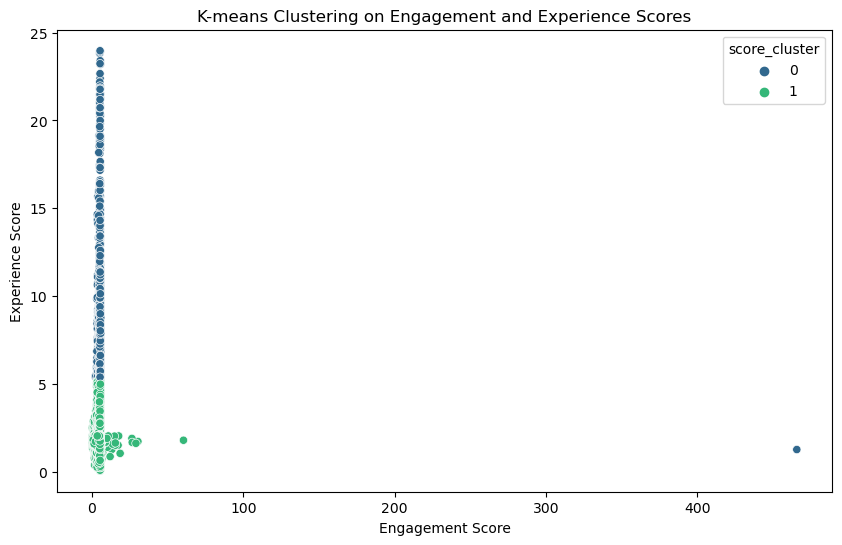

In [93]:
# Normalize engagement and experience scores
normalized_scores = scaler.fit_transform(user_scores[['engagement_score', 'experience_score']])

# Apply K-means clustering with k=2
kmeans_scores = KMeans(n_clusters=2, random_state=42)
user_scores['score_cluster'] = kmeans_scores.fit_predict(normalized_scores)

# Visualize the clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engagement_score', y='experience_score', hue='score_cluster', data=user_scores, palette='viridis')
plt.title('K-means Clustering on Engagement and Experience Scores')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.show()

# Aggregate Satisfaction and Experience Score per Cluster

### Aggregate the average satisfaction and experience scores per cluster.

   score_cluster  engagement_score  experience_score  satisfaction_score
0              0          5.564967          8.617221            7.091094
1              1          5.013769          1.970627            3.492198


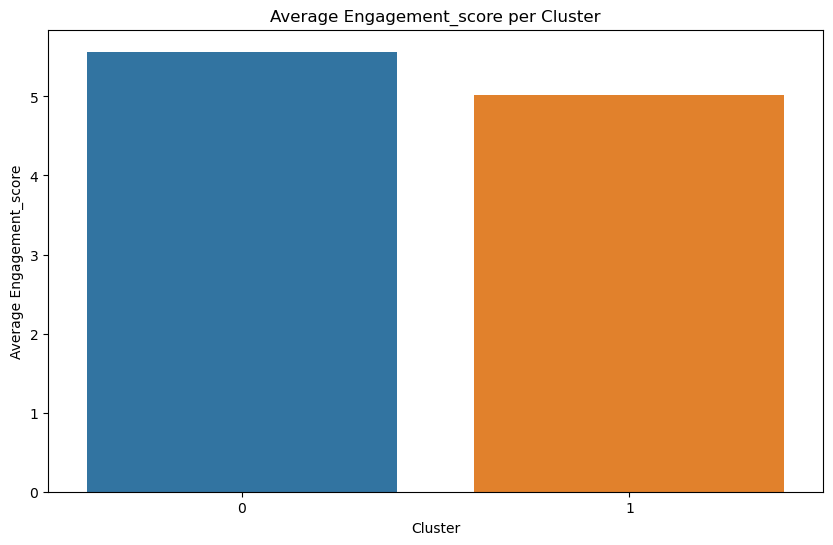

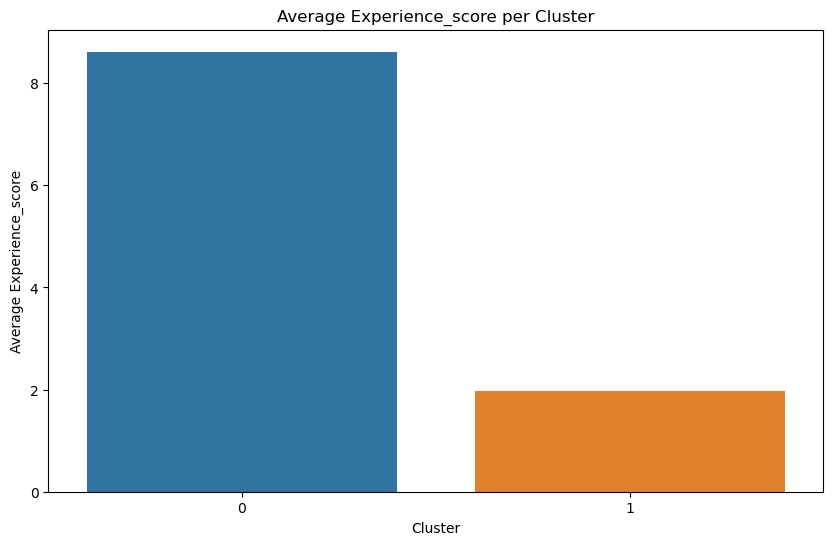

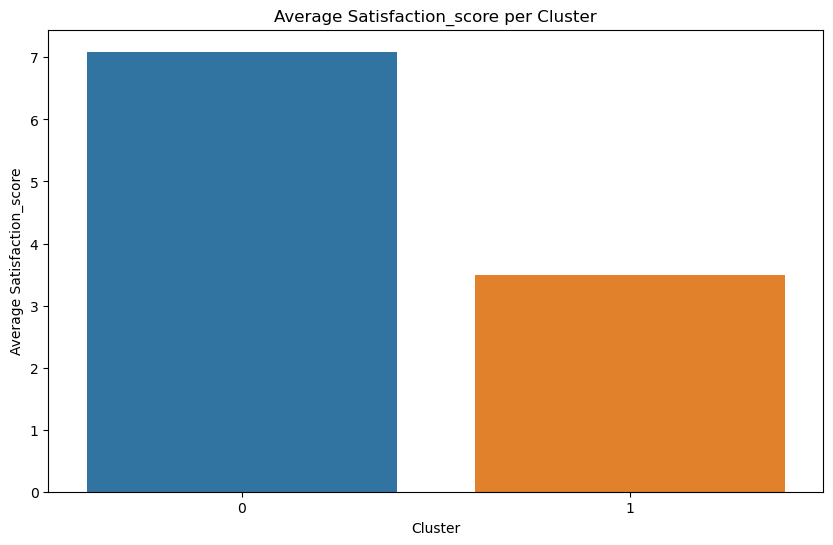

In [94]:
# Aggregate average scores per cluster
cluster_aggregates = user_scores.groupby('score_cluster').agg({
    'engagement_score': 'mean',
    'experience_score': 'mean',
    'satisfaction_score': 'mean'
}).reset_index()

print(cluster_aggregates)

# Visualize the aggregate scores

plt.figure(figsize=(10, 6))
sns.barplot(x='score_cluster', y='engagement_score', data=cluster_aggregates)
plt.title('Average Engagement_score per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Engagement_score')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='score_cluster', y='experience_score', data=cluster_aggregates)
plt.title('Average Experience_score per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Experience_score')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='score_cluster', y='satisfaction_score', data=cluster_aggregates)
plt.title('Average Satisfaction_score per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Satisfaction_score')
plt.show()

In [95]:
import pickle
from sklearn import metrics

In [96]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [97]:
import streamlit as st